##Load Libraries


In [1]:
# Load Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 
import multiprocessing
import random
import seaborn as sns



from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
import timeit

## Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Leamos el dataset a utilizar.

In [4]:
# Load the dataset 
X = pd.read_csv('/content/drive/My Drive/TFM_DF/dt_c3_2_cat0_sin_outliers.csv', index_col=0)
X

,purchase_id,"q_Aceite, especias y salsas",q_Agua y refrescos,q_Aperitivos,"q_Arroz, legumbres y pasta","q_Azúcar, caramelos y chocolate",q_Bebé,q_Bodega,"q_Cacao, café e infusiones",q_Carne,q_Cereales y galletas,q_Charcutería y quesos,q_Congelados,"q_Conservas, caldos y cremas",q_Cuidado del cabello,q_Cuidado facial y corporal,q_Fitoterapia y parafarmacia,q_Fruta y verdura,"q_Huevos, leche y mantequilla",q_Limpieza y hogar,q_Maquillaje,q_Marisco y pescado,q_Mascotas,q_Panadería y pastelería,q_Pizzas y platos preparados,q_Postres y yogures,q_Zumos,"i_Aceite, especias y salsas",i_Agua y refrescos,i_Aperitivos,"i_Arroz, legumbres y pasta","i_Azúcar, caramelos y chocolate",i_Bebé,i_Bodega,"i_Cacao, café e infusiones",i_Carne,i_Cereales y galletas,i_Charcutería y quesos,i_Congelados,"i_Conservas, caldos y cremas",...,"percp_Aceite, especias y salsas",percp_Agua y refrescos,percp_Aperitivos,"percp_Arroz, legumbres y pasta","percp_Azúcar, caramelos y chocolate",percp_Bebé,percp_Bodega,"percp_Cacao, café e infusiones",percp_Carne,percp_Cereales y galletas,percp_Charcutería y quesos,percp_Congelados,"percp_Conservas, caldos y cremas",percp_Cuidado del cabello,percp_Cuidado facial y corporal,percp_Fitoterapia y parafarmacia,percp_Fruta y verdura,"percp_Huevos, leche y mantequilla",percp_Limpieza y hogar,percp_Maquillaje,percp_Marisco y pescado,percp_Mascotas,percp_Panadería y pastelería,percp_Pizzas y platos preparados,percp_Postres y yogures,percp_Zumos,count_creation_card,count_card_update,count_card_country,Spain,datetime_diff_sec,datetime_diff_min,regular_customer,year,month,above_average,quarter,season,datetime_dif_card_sec,datetime_dif_card_min
564,53326,2,2,0,3,0,0,0,1,0,0,0,1.0,0,2,6,0,6.0,2,0,0,0.0,0,1,1,0,0,7.38,6.96,0.00,2.69,0.00,0.0,0.00,3.09,0.00,0.00,0.00,2.99,0.00,...,145.85,137.55,0.00,35.57,0.00,0.0,0.00,122.13,0.00,0.00,0.00,118.18,0.00,110.28,106.32,0.00,50.99,134.39,0.00,0.0,0.0,0.0,256.92,94.47,0.00,0.00,1,1,1,1,1201.0,20.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
1056,54662,7,1,0,3,3,0,0,1,6,3,9,0.0,0,0,1,0,14.0,1,13,0,0.0,0,1,0,2,0,10.45,3.48,0.00,2.84,3.94,0.0,0.00,3.09,24.69,2.94,14.10,0.00,0.00,...,86.63,202.33,0.00,55.23,76.16,0.0,0.00,179.65,239.53,56.98,91.28,0.00,0.00,0.00,55.23,0.00,28.49,310.47,111.05,0.0,0.0,0.0,377.91,0.00,50.58,0.00,1,1,1,1,170997.0,2849.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
1058,54664,7,1,0,3,3,0,0,1,6,3,9,3.0,0,0,3,0,14.0,1,13,0,0.0,0,2,0,2,0,10.45,3.48,0.00,2.84,3.94,0.0,0.00,3.09,24.69,2.94,14.10,6.15,0.00,...,87.65,204.71,0.00,55.88,77.06,0.0,0.00,181.76,242.35,57.65,92.35,120.59,0.00,0.00,69.41,0.00,28.82,314.12,112.35,0.0,0.0,0.0,202.35,0.00,51.18,0.00,1,1,1,1,171199.0,2853.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
1581,55924,6,30,16,46,48,0,0,24,16,4,6,0.0,0,8,12,0,10.0,4,0,0,24.0,0,0,0,10,0,43.80,86.00,15.24,53.10,65.80,0.0,0.00,69.74,81.48,5.40,6.00,0.00,0.00,...,608.33,239.17,79.17,95.83,114.17,0.0,0.00,242.50,424.17,112.50,83.33,0.00,0.00,280.00,434.17,0.00,81.67,333.33,0.00,0.0,280.0,0.0,0.00,0.00,80.83,0.00,2,2,2,0,-99950.0,-1666.0,1,2018,8,1,q3,Summer,39362777.0,656046.0
1586,55938,0,2,3,0,0,0,2,1,3,0,3,0.0,0,0,4,1,5.0,3,5,0,0.0,0,4,0,1,0,0.00,4.12,5.00,0.00,0.00,0.0,10.56,4.99,11.22,0.00,7.08,0.00,0.00,...,0.00,104.57,84.77,0.00,0.00,0.0,268.02,253.30,189.85,0.00,119.80,0.00,0.00,0.00,75.13,35.03,36.55,72.59,104.06,0.0,0.0,0.0,51.27,0.00,65.48,0.00,1,1,1,1,354946.0,5915.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524375,5316196,0,0,5,0,0,0,4,0,0,0,0,0.0,2,0,0,0,12.0,2,0,0,0.0,0,4,0,2,2,0.00,0.00,10.20,0.00,0.00,0.0,12.00,0.00,0.00,0.00,0.00,0.00,2.50,...,0.00,0.00,65.38,0.00,0.00,0.0,96.15,0.00,0.00,0.00,0.00,0.00,40.06,0.00,0.00,0.00,17.95,

In [ ]:
X.shape

(524380, 179)

In [ ]:
X=X.drop(columns= ['purchase_id', 'Spain'])
X

,"q_Aceite, especias y salsas",q_Agua y refrescos,q_Aperitivos,"q_Arroz, legumbres y pasta","q_Azúcar, caramelos y chocolate",q_Bebé,q_Bodega,"q_Cacao, café e infusiones",q_Carne,q_Cereales y galletas,q_Charcutería y quesos,q_Congelados,"q_Conservas, caldos y cremas",q_Cuidado del cabello,q_Cuidado facial y corporal,q_Fitoterapia y parafarmacia,q_Fruta y verdura,"q_Huevos, leche y mantequilla",q_Limpieza y hogar,q_Maquillaje,q_Marisco y pescado,q_Mascotas,q_Panadería y pastelería,q_Pizzas y platos preparados,q_Postres y yogures,q_Zumos,"i_Aceite, especias y salsas",i_Agua y refrescos,i_Aperitivos,"i_Arroz, legumbres y pasta","i_Azúcar, caramelos y chocolate",i_Bebé,i_Bodega,"i_Cacao, café e infusiones",i_Carne,i_Cereales y galletas,i_Charcutería y quesos,i_Congelados,"i_Conservas, caldos y cremas",i_Cuidado del cabello,i_Cuidado facial y corporal,i_Fitoterapia y parafarmacia,i_Fruta y verdura,"i_Huevos, leche y mantequilla",i_Limpieza y hogar,i_Maquillaje,i_Marisco y pescado,i_Mascotas,i_Panadería y pastelería,i_Pizzas y platos preparados,i_Postres y yogures,i_Zumos,"p_Aceite, especias y salsas",p_Agua y refrescos,p_Aperitivos,"p_Arroz, legumbres y pasta","p_Azúcar, caramelos y chocolate",p_Bebé,p_Bodega,"p_Cacao, café e infusiones",p_Carne,p_Cereales y galletas,p_Charcutería y quesos,p_Congelados,"p_Conservas, caldos y cremas",p_Cuidado del cabello,p_Cuidado facial y corporal,p_Fitoterapia y parafarmacia,p_Fruta y verdura,"p_Huevos, leche y mantequilla",p_Limpieza y hogar,p_Maquillaje,p_Marisco y pescado,p_Mascotas,p_Panadería y pastelería,p_Pizzas y platos preparados,p_Postres y yogures,p_Zumos,client_type,card_country_code,order_total_ordered_price,Alpha-3 code,Class,purchase_deliv_sec,"perc_Aceite, especias y salsas",perc_Agua y refrescos,perc_Aperitivos,"perc_Arroz, legumbres y pasta","perc_Azúcar, caramelos y chocolate",perc_Bebé,perc_Bodega,"perc_Cacao, café e infusiones",perc_Carne,perc_Cereales y galletas,perc_Charcutería y quesos,perc_Congelados,"perc_Conservas, caldos y cremas",perc_Cuidado del cabello,perc_Cuidado facial y corporal,perc_Fitoterapia y parafarmacia,perc_Fruta y verdura,"perc_Huevos, leche y mantequilla",perc_Limpieza y hogar,perc_Maquillaje,perc_Marisco y pescado,perc_Mascotas,perc_Panadería y pastelería,perc_Pizzas y platos preparados,perc_Postres y yogures,perc_Zumos,total_quantity,"percq_Aceite, especias y salsas",percq_Agua y refrescos,percq_Aperitivos,"percq_Arroz, legumbres y pasta","percq_Azúcar, caramelos y chocolate",percq_Bebé,percq_Bodega,"percq_Cacao, café e infusiones",percq_Carne,percq_Cereales y galletas,percq_Charcutería y quesos,percq_Congelados,"percq_Conservas, caldos y cremas",percq_Cuidado del cabello,percq_Cuidado facial y corporal,percq_Fitoterapia y parafarmacia,percq_Fruta y verdura,"percq_Huevos, leche y mantequilla",percq_Limpieza y hogar,percq_Maquillaje,percq_Marisco y pescado,percq_Mascotas,percq_Panadería y pastelería,percq_Pizzas y platos preparados,percq_Postres y yogures,percq_Zumos,order_total_unite_price,"percp_Aceite, especias y salsas",percp_Agua y refrescos,percp_Aperitivos,"percp_Arroz, legumbres y pasta","percp_Azúcar, caramelos y chocolate",percp_Bebé,percp_Bodega,"percp_Cacao, café e infusiones",percp_Carne,percp_Cereales y galletas,percp_Charcutería y quesos,percp_Congelados,"percp_Conservas, caldos y cremas",percp_Cuidado del cabello,percp_Cuidado facial y corporal,percp_Fitoterapia y parafarmacia,percp_Fruta y verdura,"percp_Huevos, leche y mantequilla",percp_Limpieza y hogar,percp_Maquillaje,percp_Marisco y pescado,percp_Mascotas,percp_Panadería y pastelería,percp_Pizzas y platos preparados,percp_Postres y yogures,percp_Zumos,count_creation_card,count_card_update,count_card_country,datetime_diff_sec,datetime_diff_min,regular_customer,year,month,above_average,quarter,season,datetime_dif_card_sec,datetime_dif_card_min
564,2,2,0,3,0,0,0,1,0,0,0,1.0,0,2,6,0,6.0,2,0,0,0.0,0,1,1,0,0,7.38,6.96,0.00,2.69,0.00,0.0,0.00,3.09,0.00,0.00,0.00,2.99,0.00,5.58,16.14,0.0

## Pre-procesado

### One-Hot Encoding

Utilizaremos la técnica de one-hot encoding.

<img src="figures/oh.png" width="50%">


Seleccionemos las variables categóricas en primer lugar.

In [ ]:
#Mostramos todas las columnas para identificar las categoricas
cols = X.columns.tolist()
cols

['q_Aceite, especias y salsas',
 'q_Agua y refrescos',
 'q_Aperitivos',
 'q_Arroz, legumbres y pasta',
 'q_Azúcar, caramelos y chocolate',
 'q_Bebé',
 'q_Bodega',
 'q_Cacao, café e infusiones',
 'q_Carne',
 'q_Cereales y galletas',
 'q_Charcutería y quesos',
 'q_Congelados',
 'q_Conservas, caldos y cremas',
 'q_Cuidado del cabello',
 'q_Cuidado facial y corporal',
 'q_Fitoterapia y parafarmacia',
 'q_Fruta y verdura',
 'q_Huevos, leche y mantequilla',
 'q_Limpieza y hogar',
 'q_Maquillaje',
 'q_Marisco y pescado',
 'q_Mascotas',
 'q_Panadería y pastelería',
 'q_Pizzas y platos preparados',
 'q_Postres y yogures',
 'q_Zumos',
 'i_Aceite, especias y salsas',
 'i_Agua y refrescos',
 'i_Aperitivos',
 'i_Arroz, legumbres y pasta',
 'i_Azúcar, caramelos y chocolate',
 'i_Bebé',
 'i_Bodega',
 'i_Cacao, café e infusiones',
 'i_Carne',
 'i_Cereales y galletas',
 'i_Charcutería y quesos',
 'i_Congelados',
 'i_Conservas, caldos y cremas',
 'i_Cuidado del cabello',
 'i_Cuidado facial y corporal',


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
#Convert categorical vars that are int to object
X[['year','month']]= X[['year','month']].astype(str)
X.select_dtypes('object')

,client_type,Alpha-3 code,year,month,quarter,season
564,AND,ESP,2018,8,q3,Summer
1056,AND,ESP,2018,8,q3,Summer
1058,AND,ESP,2018,8,q3,Summer
1581,WEB,DNK,2018,8,q3,Summer
1586,AND,ESP,2018,8,q3,Summer
...,...,...,...,...,...,...
524375,IOS,ESP,2020,5,q2,Spring
524376,IOS,ESP,2020,5,q2,Spring
524377,WEB,ESP,2020,5,q2,Spring
524378,AND,ESP,2020,5,q2,Spring


In [ ]:
categorical_vars = set(['Alpha-3 code','client_type', 'year','month', 'quarter', 'season' ])
numerical_vars = set(X.columns) - categorical_vars
categorical_vars = list(categorical_vars)
numerical_vars = list(numerical_vars)

In [ ]:
print(categorical_vars)
print(numerical_vars)

['month', 'quarter', 'year', 'season', 'client_type', 'Alpha-3 code']
['q_Charcutería y quesos', 'percp_Pizzas y platos preparados', 'perc_Cuidado facial y corporal', 'perc_Agua y refrescos', 'percq_Bodega', 'q_Panadería y pastelería', 'perc_Postres y yogures', 'p_Fruta y verdura', 'perc_Fitoterapia y parafarmacia', 'p_Fitoterapia y parafarmacia', 'percq_Cacao, café e infusiones', 'q_Conservas, caldos y cremas', 'i_Cuidado facial y corporal', 'p_Carne', 'percp_Agua y refrescos', 'p_Limpieza y hogar', 'q_Carne', 'p_Cereales y galletas', 'percp_Aperitivos', 'q_Fruta y verdura', 'perc_Azúcar, caramelos y chocolate', 'i_Marisco y pescado', 'i_Bodega', 'perc_Huevos, leche y mantequilla', 'q_Postres y yogures', 'datetime_dif_card_min', 'i_Aperitivos', 'perc_Fruta y verdura', 'q_Fitoterapia y parafarmacia', 'percq_Huevos, leche y mantequilla', 'order_total_unite_price', 'percp_Carne', 'percq_Pizzas y platos preparados', 'perc_Carne', 'perc_Cereales y galletas', 'percq_Cuidado facial y corpora

Realizamos one hot encoding de las variables categoricas

In [ ]:
ohe = OneHotEncoder(sparse = False)
ohe_fit = ohe.fit(X[categorical_vars])
X_ohe = pd.DataFrame(ohe.fit_transform(X[categorical_vars]))
X_ohe.columns = pd.DataFrame(ohe_fit.get_feature_names())

Visualizamos los datos iniciales y los que están con one hot encoding para ver la diferencia

In [ ]:
X[categorical_vars].head()

,month,quarter,year,season,client_type,Alpha-3 code
564,8,q3,2018,Summer,AND,ESP
1056,8,q3,2018,Summer,AND,ESP
1058,8,q3,2018,Summer,AND,ESP
1581,8,q3,2018,Summer,WEB,DNK
1586,8,q3,2018,Summer,AND,ESP


In [ ]:
X_ohe

,"(x0_1,)","(x0_10,)","(x0_11,)","(x0_12,)","(x0_2,)","(x0_3,)","(x0_4,)","(x0_5,)","(x0_6,)","(x0_7,)","(x0_8,)","(x0_9,)","(x1_q1,)","(x1_q2,)","(x1_q3,)","(x1_q4,)","(x2_2018,)","(x2_2019,)","(x2_2020,)","(x3_Autumn,)","(x3_Spring,)","(x3_Summer,)","(x3_Winter,)","(x4_AND,)","(x4_IOS,)","(x4_WEB,)","(x5_AGO,)","(x5_AND,)","(x5_ARE,)","(x5_ARG,)","(x5_AUS,)","(x5_AUT,)","(x5_BEL,)","(x5_BGR,)","(x5_BLR,)","(x5_BOL,)","(x5_BRA,)","(x5_CAN,)","(x5_CHE,)","(x5_CHL,)","(x5_CHN,)","(x5_CMR,)","(x5_COL,)","(x5_CRI,)","(x5_CUW,)","(x5_CYP,)","(x5_CZE,)","(x5_DEU,)","(x5_DNK,)","(x5_DOM,)","(x5_ECU,)","(x5_EGY,)","(x5_ESP,)","(x5_EST,)","(x5_FIN,)","(x5_FRA,)","(x5_GBR,)","(x5_GEO,)","(x5_GHA,)","(x5_GNQ,)","(x5_GRC,)","(x5_GTM,)","(x5_HKG,)","(x5_HND,)","(x5_HRV,)","(x5_HUN,)","(x5_IDN,)","(x5_IND,)","(x5_IRL,)","(x5_ISL,)","(x5_ISR,)","(x5_ITA,)","(x5_JAM,)","(x5_JOR,)","(x5_JPN,)","(x5_KAZ,)","(x5_KEN,)","(x5_KHM,)","(x5_KOR,)","(x5_KWT,)","(x5_LBN,)","(x5_LTU,)","(x5_LUX,)","(x5_LVA,)","(x5_MAR,)","(x5_MDA,)","(x5_MEX,)","(x5_MKD,)","(x5_MLT,)","(x5_MNE,)","(x5_MNG,)","(x5_MOZ,)","(x5_MUS,)","(x5_MYS,)","(x5_NLD,)","(x5_NOR,)","(x5_NZL,)","(x5_PAN,)","(x5_PER,)","(x5_PHL,)","(x5_POL,)","(x5_PRI,)","(x5_PRT,)","(x5_PRY,)","(x5_QAT,)","(x5_ROU,)","(x5_RUS,)","(x5_SAU,)","(x5_SGP,)","(x5_SLV,)","(x5_SRB,)","(x5_SVK,)","(x5_SVN,)","(x5_SWE,)","(x5_THA,)","(x5_TTO,)","(x5_TUR,)","(x5_TWN,)","(x5_UKR,)","(x5_URY,)","(x5_USA,)","(x5_VNM,)","(x5_ZAF,)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Volvemos a pegar las variables numéricas.

In [ ]:
X = pd.concat((X_ohe, X[numerical_vars].reset_index()), axis=1)
X

,"(x0_1,)","(x0_10,)","(x0_11,)","(x0_12,)","(x0_2,)","(x0_3,)","(x0_4,)","(x0_5,)","(x0_6,)","(x0_7,)","(x0_8,)","(x0_9,)","(x1_q1,)","(x1_q2,)","(x1_q3,)","(x1_q4,)","(x2_2018,)","(x2_2019,)","(x2_2020,)","(x3_Autumn,)","(x3_Spring,)","(x3_Summer,)","(x3_Winter,)","(x4_AND,)","(x4_IOS,)","(x4_WEB,)","(x5_AGO,)","(x5_AND,)","(x5_ARE,)","(x5_ARG,)","(x5_AUS,)","(x5_AUT,)","(x5_BEL,)","(x5_BGR,)","(x5_BLR,)","(x5_BOL,)","(x5_BRA,)","(x5_CAN,)","(x5_CHE,)","(x5_CHL,)","(x5_CHN,)","(x5_CMR,)","(x5_COL,)","(x5_CRI,)","(x5_CUW,)","(x5_CYP,)","(x5_CZE,)","(x5_DEU,)","(x5_DNK,)","(x5_DOM,)","(x5_ECU,)","(x5_EGY,)","(x5_ESP,)","(x5_EST,)","(x5_FIN,)","(x5_FRA,)","(x5_GBR,)","(x5_GEO,)","(x5_GHA,)","(x5_GNQ,)","(x5_GRC,)","(x5_GTM,)","(x5_HKG,)","(x5_HND,)","(x5_HRV,)","(x5_HUN,)","(x5_IDN,)","(x5_IND,)","(x5_IRL,)","(x5_ISL,)","(x5_ISR,)","(x5_ITA,)","(x5_JAM,)","(x5_JOR,)","(x5_JPN,)","(x5_KAZ,)","(x5_KEN,)","(x5_KHM,)","(x5_KOR,)","(x5_KWT,)","(x5_LBN,)","(x5_LTU,)","(x5_LUX,)","(x5_LVA,)","(x5_MAR,)","(x5_MDA,)","(x5_MEX,)","(x5_MKD,)","(x5_MLT,)","(x5_MNE,)","(x5_MNG,)","(x5_MOZ,)","(x5_MUS,)","(x5_MYS,)","(x5_NLD,)","(x5_NOR,)","(x5_NZL,)","(x5_PAN,)","(x5_PER,)","(x5_PHL,)","(x5_POL,)","(x5_PRI,)","(x5_PRT,)","(x5_PRY,)","(x5_QAT,)","(x5_ROU,)","(x5_RUS,)","(x5_SAU,)","(x5_SGP,)","(x5_SLV,)","(x5_SRB,)","(x5_SVK,)","(x5_SVN,)","(x5_SWE,)","(x5_THA,)","(x5_TTO,)","(x5_TUR,)","(x5_TWN,)","(x5_UKR,)","(x5_URY,)","(x5_USA,)","(x5_VNM,)","(x5_ZAF,)",index,q_Charcutería y quesos,percp_Pizzas y platos preparados,perc_Cuidado facial y corporal,perc_Agua y refrescos,percq_Bodega,q_Panadería y pastelería,perc_Postres y yogures,p_Fruta y verdura,perc_Fitoterapia y parafarmacia,p_Fitoterapia y parafarmacia,"percq_Cacao, café e infusiones","q_Conservas, caldos y cremas",i_Cuidado facial y corporal,p_Carne,percp_Agua y refrescos,p_Limpieza y hogar,q_Carne,p_Cereales y galletas,percp_Aperitivos,q_Fruta y verdura,"perc_Azúcar, caramelos y chocolate",i_Marisco y pescado,i_Bodega,"perc_Huevos, leche y mantequilla",q_Postres y yogures,datetime_dif_card_min,i_Aperitivos,perc_Fruta y verdura,q_Fitoterapia y parafarmacia,"percq_Huevos, leche y mantequilla",order_total_unite_price,percp_Carne,percq_Pizzas y platos preparados,perc_Carne,perc_Cereales y galletas,percq_Cuidado facial y corporal,perc_Maquillaje,q_Maquillaje,percq_Limpieza y hogar,"percp_Conservas, caldos y cremas",perc_Aperitivos,perc_Marisco y pescado,p_Zumos,"p_Huevos, leche y mantequilla",purchase_deliv_sec,percq_Cuidado del cabello,p_Postres y yogures,p_Panadería y pastelería,q_Marisco y pescado,percq_Fruta y verdura,percq_Zumos,percp_Fitoterapia y parafarmacia,percp_Limpieza y hogar,"i_Huevos, leche y mantequilla",q_Bodega,q_Agua y refrescos,"percq_Aceite, especias y salsas",percq_Aperitivos,i_Agua y refrescos,p_Bodega,i_Cereales y galletas,q_Pizzas y platos preparados,percq_Cereales y galletas,percq_Postres y yogures,i_Congelados,"p_Cacao, café e infusiones","q_Azúcar, caramelos y chocolate",q_Aperitivos,p_Charcutería y quesos,i_Zumos,percp_Cereales y galletas,"percq_Azúcar, caramelos y chocolate",regular_customer,p_Cuidado facial y corporal,percp_Cuidado del cabello,percq_Panadería y pastelería,p_Agua y refrescos,"i_Aceite, especias y salsas",order_total_ordered_price,i_Postres y yogures,percp_Panadería y pastelería,percq_Marisco y pescado,p_Pizzas y platos preparados,percp_Congelados,"percp_Cacao, café e infusiones",p_Congelados,"percp_Azúcar, caramelos y chocolate",perc_Bebé,datetime_dif_card_sec,percp_Charcutería y quesos,percp_Postres y yogures,"i_Azúcar, caramelos y chocolate",p_Mascotas,"perc_Cacao, café e infusiones",q_Congelados,count_card_update,i_Pizzas y platos preparados,"q_Aceite, especias y salsas",i_Charcutería y quesos,q_Zumos,"percp_Aceite, especias y salsas",p_Maquillaje,percq_Bebé,i_Cuidado del cabello,percq_Agua y refrescos,Class,"q_Arroz, legumbres y pasta",i_Fitoterapia y parafarmacia,"perc_Conservas, caldos y cremas",percp_Marisco y pescado,count_card_country

In [ ]:
X= X.drop(columns= 'index')
X

,"(x0_1,)","(x0_10,)","(x0_11,)","(x0_12,)","(x0_2,)","(x0_3,)","(x0_4,)","(x0_5,)","(x0_6,)","(x0_7,)","(x0_8,)","(x0_9,)","(x1_q1,)","(x1_q2,)","(x1_q3,)","(x1_q4,)","(x2_2018,)","(x2_2019,)","(x2_2020,)","(x3_Autumn,)","(x3_Spring,)","(x3_Summer,)","(x3_Winter,)","(x4_AND,)","(x4_IOS,)","(x4_WEB,)","(x5_AGO,)","(x5_AND,)","(x5_ARE,)","(x5_ARG,)","(x5_AUS,)","(x5_AUT,)","(x5_BEL,)","(x5_BGR,)","(x5_BLR,)","(x5_BOL,)","(x5_BRA,)","(x5_CAN,)","(x5_CHE,)","(x5_CHL,)","(x5_CHN,)","(x5_CMR,)","(x5_COL,)","(x5_CRI,)","(x5_CUW,)","(x5_CYP,)","(x5_CZE,)","(x5_DEU,)","(x5_DNK,)","(x5_DOM,)","(x5_ECU,)","(x5_EGY,)","(x5_ESP,)","(x5_EST,)","(x5_FIN,)","(x5_FRA,)","(x5_GBR,)","(x5_GEO,)","(x5_GHA,)","(x5_GNQ,)","(x5_GRC,)","(x5_GTM,)","(x5_HKG,)","(x5_HND,)","(x5_HRV,)","(x5_HUN,)","(x5_IDN,)","(x5_IND,)","(x5_IRL,)","(x5_ISL,)","(x5_ISR,)","(x5_ITA,)","(x5_JAM,)","(x5_JOR,)","(x5_JPN,)","(x5_KAZ,)","(x5_KEN,)","(x5_KHM,)","(x5_KOR,)","(x5_KWT,)","(x5_LBN,)","(x5_LTU,)","(x5_LUX,)","(x5_LVA,)","(x5_MAR,)","(x5_MDA,)","(x5_MEX,)","(x5_MKD,)","(x5_MLT,)","(x5_MNE,)","(x5_MNG,)","(x5_MOZ,)","(x5_MUS,)","(x5_MYS,)","(x5_NLD,)","(x5_NOR,)","(x5_NZL,)","(x5_PAN,)","(x5_PER,)","(x5_PHL,)","(x5_POL,)","(x5_PRI,)","(x5_PRT,)","(x5_PRY,)","(x5_QAT,)","(x5_ROU,)","(x5_RUS,)","(x5_SAU,)","(x5_SGP,)","(x5_SLV,)","(x5_SRB,)","(x5_SVK,)","(x5_SVN,)","(x5_SWE,)","(x5_THA,)","(x5_TTO,)","(x5_TUR,)","(x5_TWN,)","(x5_UKR,)","(x5_URY,)","(x5_USA,)","(x5_VNM,)","(x5_ZAF,)",q_Charcutería y quesos,percp_Pizzas y platos preparados,perc_Cuidado facial y corporal,perc_Agua y refrescos,percq_Bodega,q_Panadería y pastelería,perc_Postres y yogures,p_Fruta y verdura,perc_Fitoterapia y parafarmacia,p_Fitoterapia y parafarmacia,"percq_Cacao, café e infusiones","q_Conservas, caldos y cremas",i_Cuidado facial y corporal,p_Carne,percp_Agua y refrescos,p_Limpieza y hogar,q_Carne,p_Cereales y galletas,percp_Aperitivos,q_Fruta y verdura,"perc_Azúcar, caramelos y chocolate",i_Marisco y pescado,i_Bodega,"perc_Huevos, leche y mantequilla",q_Postres y yogures,datetime_dif_card_min,i_Aperitivos,perc_Fruta y verdura,q_Fitoterapia y parafarmacia,"percq_Huevos, leche y mantequilla",order_total_unite_price,percp_Carne,percq_Pizzas y platos preparados,perc_Carne,perc_Cereales y galletas,percq_Cuidado facial y corporal,perc_Maquillaje,q_Maquillaje,percq_Limpieza y hogar,"percp_Conservas, caldos y cremas",perc_Aperitivos,perc_Marisco y pescado,p_Zumos,"p_Huevos, leche y mantequilla",purchase_deliv_sec,percq_Cuidado del cabello,p_Postres y yogures,p_Panadería y pastelería,q_Marisco y pescado,percq_Fruta y verdura,percq_Zumos,percp_Fitoterapia y parafarmacia,percp_Limpieza y hogar,"i_Huevos, leche y mantequilla",q_Bodega,q_Agua y refrescos,"percq_Aceite, especias y salsas",percq_Aperitivos,i_Agua y refrescos,p_Bodega,i_Cereales y galletas,q_Pizzas y platos preparados,percq_Cereales y galletas,percq_Postres y yogures,i_Congelados,"p_Cacao, café e infusiones","q_Azúcar, caramelos y chocolate",q_Aperitivos,p_Charcutería y quesos,i_Zumos,percp_Cereales y galletas,"percq_Azúcar, caramelos y chocolate",regular_customer,p_Cuidado facial y corporal,percp_Cuidado del cabello,percq_Panadería y pastelería,p_Agua y refrescos,"i_Aceite, especias y salsas",order_total_ordered_price,i_Postres y yogures,percp_Panadería y pastelería,percq_Marisco y pescado,p_Pizzas y platos preparados,percp_Congelados,"percp_Cacao, café e infusiones",p_Congelados,"percp_Azúcar, caramelos y chocolate",perc_Bebé,datetime_dif_card_sec,percp_Charcutería y quesos,percp_Postres y yogures,"i_Azúcar, caramelos y chocolate",p_Mascotas,"perc_Cacao, café e infusiones",q_Congelados,count_card_update,i_Pizzas y platos preparados,"q_Aceite, especias y salsas",i_Charcutería y quesos,q_Zumos,"percp_Aceite, especias y salsas",p_Maquillaje,percq_Bebé,i_Cuidado del cabello,percq_Agua y refrescos,Class,"q_Arroz, legumbres y pasta",i_Fitoterapia y parafarmacia,"perc_Conservas, caldos y cremas",percp_Marisco y pescado,count_card_country,perc_

### Normalizar

Ahora vamos a normalizar los datos, es decir, llevarlos a media 0 y desviación estándar 1.

<img src="figures/tipify.png" width="50%">

In [ ]:
y = X['Class']
del X['Class']

In [ ]:
X_scale = pd.DataFrame(scale(X))
X_scale.columns = X.columns
X = X_scale
X.columns = X_scale.columns
X

,"(x0_1,)","(x0_10,)","(x0_11,)","(x0_12,)","(x0_2,)","(x0_3,)","(x0_4,)","(x0_5,)","(x0_6,)","(x0_7,)","(x0_8,)","(x0_9,)","(x1_q1,)","(x1_q2,)","(x1_q3,)","(x1_q4,)","(x2_2018,)","(x2_2019,)","(x2_2020,)","(x3_Autumn,)","(x3_Spring,)","(x3_Summer,)","(x3_Winter,)","(x4_AND,)","(x4_IOS,)","(x4_WEB,)","(x5_AGO,)","(x5_AND,)","(x5_ARE,)","(x5_ARG,)","(x5_AUS,)","(x5_AUT,)","(x5_BEL,)","(x5_BGR,)","(x5_BLR,)","(x5_BOL,)","(x5_BRA,)","(x5_CAN,)","(x5_CHE,)","(x5_CHL,)","(x5_CHN,)","(x5_CMR,)","(x5_COL,)","(x5_CRI,)","(x5_CUW,)","(x5_CYP,)","(x5_CZE,)","(x5_DEU,)","(x5_DNK,)","(x5_DOM,)","(x5_ECU,)","(x5_EGY,)","(x5_ESP,)","(x5_EST,)","(x5_FIN,)","(x5_FRA,)","(x5_GBR,)","(x5_GEO,)","(x5_GHA,)","(x5_GNQ,)","(x5_GRC,)","(x5_GTM,)","(x5_HKG,)","(x5_HND,)","(x5_HRV,)","(x5_HUN,)","(x5_IDN,)","(x5_IND,)","(x5_IRL,)","(x5_ISL,)","(x5_ISR,)","(x5_ITA,)","(x5_JAM,)","(x5_JOR,)","(x5_JPN,)","(x5_KAZ,)","(x5_KEN,)","(x5_KHM,)","(x5_KOR,)","(x5_KWT,)","(x5_LBN,)","(x5_LTU,)","(x5_LUX,)","(x5_LVA,)","(x5_MAR,)","(x5_MDA,)","(x5_MEX,)","(x5_MKD,)","(x5_MLT,)","(x5_MNE,)","(x5_MNG,)","(x5_MOZ,)","(x5_MUS,)","(x5_MYS,)","(x5_NLD,)","(x5_NOR,)","(x5_NZL,)","(x5_PAN,)","(x5_PER,)","(x5_PHL,)","(x5_POL,)","(x5_PRI,)","(x5_PRT,)","(x5_PRY,)","(x5_QAT,)","(x5_ROU,)","(x5_RUS,)","(x5_SAU,)","(x5_SGP,)","(x5_SLV,)","(x5_SRB,)","(x5_SVK,)","(x5_SVN,)","(x5_SWE,)","(x5_THA,)","(x5_TTO,)","(x5_TUR,)","(x5_TWN,)","(x5_UKR,)","(x5_URY,)","(x5_USA,)","(x5_VNM,)","(x5_ZAF,)",q_Charcutería y quesos,percp_Pizzas y platos preparados,perc_Cuidado facial y corporal,perc_Agua y refrescos,percq_Bodega,q_Panadería y pastelería,perc_Postres y yogures,p_Fruta y verdura,perc_Fitoterapia y parafarmacia,p_Fitoterapia y parafarmacia,"percq_Cacao, café e infusiones","q_Conservas, caldos y cremas",i_Cuidado facial y corporal,p_Carne,percp_Agua y refrescos,p_Limpieza y hogar,q_Carne,p_Cereales y galletas,percp_Aperitivos,q_Fruta y verdura,"perc_Azúcar, caramelos y chocolate",i_Marisco y pescado,i_Bodega,"perc_Huevos, leche y mantequilla",q_Postres y yogures,datetime_dif_card_min,i_Aperitivos,perc_Fruta y verdura,q_Fitoterapia y parafarmacia,"percq_Huevos, leche y mantequilla",order_total_unite_price,percp_Carne,percq_Pizzas y platos preparados,perc_Carne,perc_Cereales y galletas,percq_Cuidado facial y corporal,perc_Maquillaje,q_Maquillaje,percq_Limpieza y hogar,"percp_Conservas, caldos y cremas",perc_Aperitivos,perc_Marisco y pescado,p_Zumos,"p_Huevos, leche y mantequilla",purchase_deliv_sec,percq_Cuidado del cabello,p_Postres y yogures,p_Panadería y pastelería,q_Marisco y pescado,percq_Fruta y verdura,percq_Zumos,percp_Fitoterapia y parafarmacia,percp_Limpieza y hogar,"i_Huevos, leche y mantequilla",q_Bodega,q_Agua y refrescos,"percq_Aceite, especias y salsas",percq_Aperitivos,i_Agua y refrescos,p_Bodega,i_Cereales y galletas,q_Pizzas y platos preparados,percq_Cereales y galletas,percq_Postres y yogures,i_Congelados,"p_Cacao, café e infusiones","q_Azúcar, caramelos y chocolate",q_Aperitivos,p_Charcutería y quesos,i_Zumos,percp_Cereales y galletas,"percq_Azúcar, caramelos y chocolate",regular_customer,p_Cuidado facial y corporal,percp_Cuidado del cabello,percq_Panadería y pastelería,p_Agua y refrescos,"i_Aceite, especias y salsas",order_total_ordered_price,i_Postres y yogures,percp_Panadería y pastelería,percq_Marisco y pescado,p_Pizzas y platos preparados,percp_Congelados,"percp_Cacao, café e infusiones",p_Congelados,"percp_Azúcar, caramelos y chocolate",perc_Bebé,datetime_dif_card_sec,percp_Charcutería y quesos,percp_Postres y yogures,"i_Azúcar, caramelos y chocolate",p_Mascotas,"perc_Cacao, café e infusiones",q_Congelados,count_card_update,i_Pizzas y platos preparados,"q_Aceite, especias y salsas",i_Charcutería y quesos,q_Zumos,"percp_Aceite, especias y salsas",p_Maquillaje,percq_Bebé,i_Cuidado del cabello,percq_Agua y refrescos,"q_Arroz, legumbres y pasta",i_Fitoterapia y parafarmacia,"perc_Conservas, caldos y cremas",percp_Marisco y pescado,count_card_country,perc_Panade

### Split en Train/Validación/Test

Utilizaremos a modo de ejemplo los ratios habitualmente recomendados:

• Train: 70%.

• Validación: 15%.

• Test: 15%.


In [ ]:
perc_values = [0.7, 0.15, 0.15];

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_rand, X_valtest_rand, y_train_rand, y_valtest_rand = train_test_split(X, y, test_size=perc_values[1] + perc_values[2], random_state=1);

X_val_rand, X_test_rand, y_val_rand, y_test_rand = train_test_split(X_valtest_rand, y_valtest_rand, test_size= perc_values[2] / (perc_values[1] + perc_values[2]), random_state=1)

Visualizamos el tamaño de los 3 subdatasets

In [ ]:
print('Train data size = ' + str(X_train_rand.shape))
print('Train target size = ' + str(y_train_rand.shape))
print('Validation data size = ' + str(X_val_rand.shape))
print('Validation target size = ' + str(y_val_rand.shape))
print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

Train data size = (367066, 293)
Train target size = (367066,)
Validation data size = (78657, 293)
Validation target size = (78657,)
Test data size = (78657, 293)
Test target size = (78657,)



# XGBoost




1) Importar modelo.

En este caso tenemos que irnos fuera de scikit-learn para aplicar modelos XGBoost.


In [ ]:
from xgboost import XGBClassifier

Veamos su documentación.

In [ ]:
help(XGBClassifier)

2) Importar métrica.

In [ ]:
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import confusion_matrix

3) Definir el método.

Vamos a entrenar un modelo con algunos parámetros eligidos al azar.

In [ ]:
model = XGBClassifier(random_state=1)

4) Llamar al método fit para entrenar el modelo

In [ ]:
model.fit(X_train_rand, np.array(y_train_rand))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

5) Llamar al método predict para generar las predicciones.

In [ ]:
pred_train_p = model.predict(X_train_rand)
pred_val_p = model.predict(X_val_rand)
pred_test_p = model.predict(X_test_rand) 

6) Calcular métrica usando las predicciones obtenidas en el paso anterior.

In [ ]:
# Calcular métricas de evaluación
auc_train = auc(y_train_rand, pred_train_p);
auc_val = auc(y_val_rand, pred_val_p);
auc_test = auc(y_test_rand, pred_test_p);
results = pd.DataFrame()
results = results.append(pd.DataFrame(data={'model':['XGBoost (Optimized)'],'auc_train':[auc_train],'auc_val':[auc_val],'auc_test':[auc_test]}, columns=['model',  'auc_train','auc_val', 'auc_test']), ignore_index=True)

In [ ]:
results

,model,auc_train,auc_val,auc_test
0,XGBoost (Optimized),0.92189,0.909798,0.90935


In [ ]:
from sklearn.metrics import confusion_matrix 

In [ ]:
cm= confusion_matrix(y_test_rand, pred_test_p)
cm

array([[78143,     1],
       [   93,   420]])

In [ ]:
importances = list(model.feature_importances_)

In [ ]:
# tuplas de importancia y variable
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(X, importances)]
# Ordenamos las variables por importancia
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [ ]:
feature_importances[0:40]

[('total_quantity', 0.1425),
 (('x3_Spring',), 0.04059),
 ('q_Agua y refrescos', 0.03136),
 ('i_Aceite, especias y salsas', 0.03056),
 ('order_total_ordered_price', 0.02967),
 (('x1_ESP',), 0.02816),
 ('count_creation_card', 0.02429),
 ('q_Carne', 0.02248),
 ('percq_Fruta y verdura', 0.02241),
 ('percp_Bebé', 0.02039),
 (('x3_Winter',), 0.02008),
 ('p_Cereales y galletas', 0.01984),
 ('perc_Charcutería y quesos', 0.01982),
 ('purchase_deliv_sec', 0.01978),
 ('percp_Aceite, especias y salsas', 0.01971),
 ('order_total_unite_price', 0.01854),
 ('perc_Cuidado del cabello', 0.01833),
 ('q_Fruta y verdura', 0.0179),
 ('percq_Agua y refrescos', 0.01782),
 ('perc_Carne', 0.01643),
 ('perc_Bodega', 0.01576),
 ('p_Bodega', 0.01551),
 ('p_Bebé', 0.01404),
 ('percp_Carne', 0.01392),
 ('i_Bodega', 0.01239),
 ('datetime_diff_sec', 0.01206),
 ('percp_Cereales y galletas', 0.01198),
 ('percq_Cuidado del cabello', 0.01198),
 ('q_Charcutería y quesos', 0.0118),
 ('p_Zumos', 0.01173),
 ('q_Cuidado del c

## Grid Search


Vamos a proceder a calcular los parámetros óptimos para nuestro modelo. En nuestro caso queremos optimizar todos los hiperparámetros que hemos visto en clase:

![imagen.png](attachment:imagen.png)

Para establecer nthread detectaremos automáticamente el número de CPUs en nuestro sistema y dejaremos uno libre. Para ello usaremos la función multiprocessing.cpu_count()

In [ ]:
help(multiprocessing.cpu_count)

Help on method cpu_count in module multiprocessing.context:

cpu_count() method of multiprocessing.context.DefaultContext instance
    Returns the number of CPUs in the system



In [ ]:
nthread = multiprocessing.cpu_count() - 1;
print(nthread);

3


Podemos ayudar a nuestro modelo XGBoost indicando el ratio entre casos negativos y positivos.

In [ ]:
scale_pos_weight = sum(y_train_rand == 0) / sum(y_train_rand == 1)
print(scale_pos_weight)

147.54957507082153


XGBoost lleva a cabo computaciones con componente **aleatorio** (por ejemplo, al hacer subsample), por lo que es muy importante que nos aseguremos de controlar la semilla aleatorio que empleamos para poder replicar el modelo que evaluamos en validación en caso de ser elegido como el modelo final.

In [ ]:
random_state = 1;

Definimos el grid a llevar a cabo

In [ ]:
nrounds_values = [10]
eta_values = [0.3]
gamma_values = [1]
max_depth_values = [50, 60]
min_child_weight_values = [10]
subsample_values = [1]
colsample_bytree_values = [1]
num_parallel_tree_values = [1,10]
lambda_values = [0,1]
alpha_values = [0, 1]

params_values = {'nrounds': nrounds_values,
             'eta': eta_values,
             'gamma': gamma_values,
             'max_depth': max_depth_values,
             'min_child_weight': min_child_weight_values,
             'subsample': subsample_values,
             'colsample_bytree': colsample_bytree_values,
             'num_parallel_tree': num_parallel_tree_values,
             'lambda': lambda_values,
             'alpha': alpha_values,}

num_iteraciones = len(params_values['nrounds']) * len(params_values['eta']) * len(params_values['gamma']) * len(params_values['max_depth']) * \
len(params_values['min_child_weight']) * len(params_values['subsample']) * len(params_values['colsample_bytree']) * \
len(params_values['num_parallel_tree']) * len(params_values['lambda']) * len(params_values['alpha'] )

print('El numero de iteraciones es', num_iteraciones)

El numero de iteraciones es 16


In [ ]:
grid_results = pd.DataFrame();
num_iter = 0
for nrounds in params_values['nrounds']:
    for eta in params_values['eta']:
        for gamma in params_values['gamma']:
            for max_depth in params_values['max_depth']:
                for min_child_weight in params_values['min_child_weight']:
                    for subsample in params_values['subsample']:
                        for colsample_bytree in params_values['colsample_bytree']:
                            for num_parallel_tree in params_values['num_parallel_tree']:
                                for lamda in params_values['lambda']:
                                    for alpha in params_values['alpha']:

                                        # print control iteracion modelo
                                        print('Inicio de iteracion ' + str(num_iter) + 
                                              '. Parametro n_estimators = ' + str(nrounds) + 
                                              ', parametro eta = ' + str(eta) + 
                                              ', parametro gamma = '  + str(gamma) +
                                              ', parametro max_depth = '  + str(max_depth) +
                                              ', parametro min_child_weight = '  + str(min_child_weight) +
                                              ', parametro subsample = '  + str(subsample) +
                                              ', parametro colsample_bytree = '  + str(colsample_bytree) +
                                              ', parametro num_parallel_tree = '  + str(num_parallel_tree) +
                                              ', parametro lambda = '  + str(lamda) +
                                              ', parametro alpha = '  + str(alpha) + 
                                              '\n')
                                        # Entrenar modelo
                                        model = XGBClassifier(booster= 'gblinear', nthread = nthread, 
                                                              scale_pos_weight = scale_pos_weight,
                                                              random_state = random_state,
                                                              n_estimators = nrounds,
                                                              learning_rate = eta, 
                                                              gamma = gamma,
                                                              max_depth = max_depth,
                                                              min_child_weight = min_child_weight ,
                                                              subsample = subsample,
                                                              colsample_bytree = colsample_bytree,
                                                              num_parallel_tree = num_parallel_tree,
                                                              reg_lambda = lamda,
                                                              reg_alpha = alpha)
                                        model.fit(X_train_rand, np.array(y_train_rand))

                                        # Generar predicciones
                                        pred_train_p = model.predict_proba(X_train_rand)
                                        pred_val_p = model.predict_proba(X_val_rand)

                                        # Calcular métricas de evaluación
                                        auc_train = auc(y_train_rand, pred_train_p[:, 1])
                                        auc_val = auc(y_val_rand, pred_val_p[:, 1])

                                        num_iter += 1; 

                                        print('Fin de iteracion ' + str(num_iter) + 
                                              '. Parametro nrounds = ' + str(nrounds) + 
                                              ', parametro eta = ' + str(eta) + 
                                              ', parametro gamma = '  + str(gamma) +
                                              ', parametro max_depth = '  + str(max_depth) +
                                              ', parametro min_child_weight = '  + str(min_child_weight) +
                                              ', parametro subsample = '  + str(subsample) +
                                              ', parametro colsample_bytree = '  + str(colsample_bytree) +
                                              ', parametro num_parallel_tree = '  + str(num_parallel_tree) +
                                              ', parametro lambda = '  + str(lamda) +
                                              ', parametro alpha = '  + str(alpha) + 
                                              '. AUC train = '  + str(auc_train) + 
                                              ' -  AUC val = '  + str(auc_val)  + 
                                              '\n')
                                        grid_results = grid_results.append(pd.DataFrame(data={'nrounds':[nrounds],
                                                                                              'eta':[eta],
                                                                                              'gamma':[gamma],
                                                                                              'max_depth':[max_depth],
                                                                                              'min_child_weight':[min_child_weight],
                                                                                              'subsample':[subsample],
                                                                                              'colsample_bytree':[colsample_bytree],
                                                                                              'num_parallel_tree':[num_parallel_tree],
                                                                                              'lamda':[lamda],
                                                                                              'alpha':[alpha],
                                                                                              'auc_train':[auc_train],
                                                                                              'auc_val':[auc_val]},
                                                                                       columns=['nrounds', 'eta', 'gamma', 'max_depth',
                                                                                               'min_child_weight', 'subsample',
                                                                                               'colsample_bytree', 'num_parallel_tree',
                                                                                               'lamda', 'alpha',
                                                                                               'auc_train', 'auc_val']), 
                                                                           ignore_index=True)
                                        

Inicio de iteracion 0. Parametro n_estimators = 10, parametro eta = 0.3, parametro gamma = 1, parametro max_depth = 50, parametro min_child_weight = 10, parametro subsample = 1, parametro colsample_bytree = 1, parametro num_parallel_tree = 1, parametro lambda = 0, parametro alpha = 0

Fin de iteracion 1. Parametro nrounds = 10, parametro eta = 0.3, parametro gamma = 1, parametro max_depth = 50, parametro min_child_weight = 10, parametro subsample = 1, parametro colsample_bytree = 1, parametro num_parallel_tree = 1, parametro lambda = 0, parametro alpha = 0. AUC train = 0.9953052557183175 -  AUC val = 0.9950488232709747

Inicio de iteracion 1. Parametro n_estimators = 10, parametro eta = 0.3, parametro gamma = 1, parametro max_depth = 50, parametro min_child_weight = 10, parametro subsample = 1, parametro colsample_bytree = 1, parametro num_parallel_tree = 1, parametro lambda = 0, parametro alpha = 1

Fin de iteracion 2. Parametro nrounds = 10, parametro eta = 0.3, parametro gamma = 1, 

In [ ]:
grid_results

,nrounds,eta,gamma,max_depth,min_child_weight,subsample,colsample_bytree,num_parallel_tree,lamda,alpha,auc_train,auc_val
0,10,0.3,1,50,10,1,1,1,0,0,0.995305,0.995049
1,10,0.3,1,50,10,1,1,1,0,1,0.947024,0.952049
2,10,0.3,1,50,10,1,1,1,1,0,0.987032,0.987027
3,10,0.3,1,50,10,1,1,1,1,1,0.947037,0.952075
4,10,0.3,1,50,10,1,1,10,0,0,0.995320,0.995087
5,10,0.3,1,50,10,1,1,10,0,1,0.947117,0.952084
6,10,0.3,1,50,10,1,1,10,1,0,0.987060,0.987073
7,10,0.3,1,50,10,1,1,10,1,1,0.946804,0.951780
8,10,0.3,1,60,10,1,1,1,0,0,0.995262,0.994875
9,10,0.3,1,60,10,1,1,1,0,1,0.947150,0.951987


Comparemos el peor y el mejor resultado

In [ ]:
print(grid_results.iloc[grid_results['auc_val'].idxmin()])
print('-------------------------------------------')
print(grid_results.iloc[grid_results['auc_val'].idxmax()])

nrounds              10.000000
eta                   0.300000
gamma                 1.000000
max_depth            50.000000
min_child_weight     10.000000
subsample             1.000000
colsample_bytree      1.000000
num_parallel_tree    10.000000
lamda                 1.000000
alpha                 1.000000
auc_train             0.946804
auc_val               0.951780
Name: 7, dtype: float64
-------------------------------------------
nrounds              10.000000
eta                   0.300000
gamma                 1.000000
max_depth            50.000000
min_child_weight     10.000000
subsample             1.000000
colsample_bytree      1.000000
num_parallel_tree    10.000000
lamda                 0.000000
alpha                 0.000000
auc_train             0.995320
auc_val               0.995087
Name: 4, dtype: float64


##Reentrenamos el modelo

In [ ]:
model = XGBClassifier(nrounds=10, eta = 0.3, gamma = 0, max_depth=6, min_child_weight=10, subsample=1, colsample_bytree=1, num_parallel_tree=20, 
                      lamda= 0, alpha=0)

4) Llamar al método fit para entrenar el modelo

In [ ]:
model.fit(X_train_rand, np.array(y_train_rand))

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0, lamda=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
              nrounds=10, nthread=None, num_parallel_tree=20,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

5) Llamar al método predict para generar las predicciones.

In [ ]:
print('Validation data size = ' + str(X_val_rand.shape))
print('Validation target size = ' + str(y_val_rand.shape))
print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

# Combinar train y validación
X_test_rand = pd.concat((X_val_rand,X_test_rand), axis = 0)
y_test_rand = np.concatenate((y_val_rand, y_test_rand), axis = 0)

del X_val_rand, y_val_rand

print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

Validation data size = (78657, 293)
Validation target size = (78657,)
Test data size = (78657, 293)
Test target size = (78657,)
Test data size = (157314, 293)
Test target size = (157314,)


In [ ]:
pred_train_p = model.predict(X_train_rand)
pred_test_p = model.predict(X_test_rand)

6) Calcular métrica usando las predicciones obtenidas en el paso anterior.

In [ ]:
# Calcular métricas de evaluación
auc_train = auc(y_train_rand, pred_train_p);
auc_test = auc(y_test_rand, pred_test_p);
results = pd.DataFrame()
results = results.append(pd.DataFrame(data={'model':['XGBoost (Optimized)'],'auc_train':[auc_train],'auc_test':[auc_test]}, columns=['model',  'auc_train', 'auc_test']), ignore_index=True)

In [ ]:
results

,model,auc_train,auc_test
0,XGBoost (Optimized),0.95993,0.945246


In [ ]:
cm= confusion_matrix(y_test_rand, pred_test_p)
cm

array([[156287,      4],
       [   112,    911]])

###Importancia de las variables

In [ ]:
importances = list(model.feature_importances_)

In [ ]:
# tuplas de importancia y variable
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(X, importances)]
# Ordenamos las variables por importancia
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [ ]:
feature_importances[0:40]

[('total_quantity', 0.14438),
 ('order_total_ordered_price', 0.02216),
 ('q_Arroz, legumbres y pasta', 0.0191),
 (('x0_2',), 0.0189),
 ('percq_Fruta y verdura', 0.01886),
 (('x3_Spring',), 0.01798),
 ('q_Cuidado del cabello', 0.01771),
 ('i_Cuidado del cabello', 0.01753),
 ('perc_Bebé', 0.01706),
 ('q_Carne', 0.01642),
 ('count_card_update', 0.01505),
 ('percq_Agua y refrescos', 0.01486),
 ('p_Panadería y pastelería', 0.01457),
 ('p_Bebé', 0.01428),
 ('q_Fruta y verdura', 0.01374),
 (('x4_ESP',), 0.01337),
 ('percp_Aceite, especias y salsas', 0.01321),
 ('q_Cuidado facial y corporal', 0.01272),
 ('i_Charcutería y quesos', 0.01254),
 ('q_Agua y refrescos', 0.01252),
 ('percp_Maquillaje', 0.01229),
 (('x3_Winter',), 0.01206),
 ('percp_Cereales y galletas', 0.01192),
 ('order_total_unite_price', 0.01192),
 ('q_Panadería y pastelería', 0.01183),
 ('p_Bodega', 0.01145),
 ('purchase_deliv_sec', 0.01121),
 ('p_Cereales y galletas', 0.01059),
 (('x1_2019',), 0.01),
 ('percq_Panadería y pastele

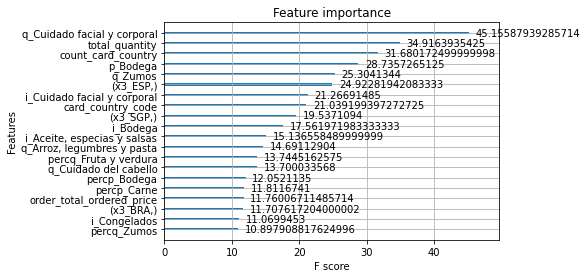

In [ ]:
from xgboost import plot_importance
plot_importance(model, max_num_features=20, importance_type='gain') # top 10 most important features
plt.show()

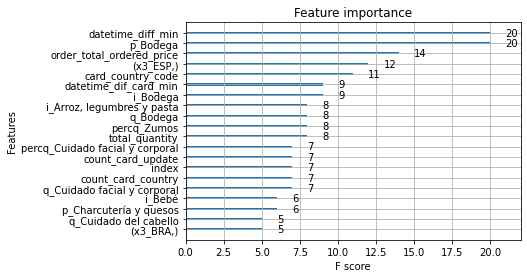

In [ ]:
from xgboost import plot_importance
plot_importance(model, max_num_features=20, importance_type='weight') # top 10 most important features
plt.show()

#SUBSET

In [ ]:
# Load the dataset 
X = pd.read_csv('/content/drive/My Drive/TFM_DF/dt_c3_2_cat0_sin_outliers.csv', index_col=0)
X

,purchase_id,"q_Aceite, especias y salsas",q_Agua y refrescos,q_Aperitivos,"q_Arroz, legumbres y pasta","q_Azúcar, caramelos y chocolate",q_Bebé,q_Bodega,"q_Cacao, café e infusiones",q_Carne,q_Cereales y galletas,q_Charcutería y quesos,q_Congelados,"q_Conservas, caldos y cremas",q_Cuidado del cabello,q_Cuidado facial y corporal,q_Fitoterapia y parafarmacia,q_Fruta y verdura,"q_Huevos, leche y mantequilla",q_Limpieza y hogar,q_Maquillaje,q_Marisco y pescado,q_Mascotas,q_Panadería y pastelería,q_Pizzas y platos preparados,q_Postres y yogures,q_Zumos,"i_Aceite, especias y salsas",i_Agua y refrescos,i_Aperitivos,"i_Arroz, legumbres y pasta","i_Azúcar, caramelos y chocolate",i_Bebé,i_Bodega,"i_Cacao, café e infusiones",i_Carne,i_Cereales y galletas,i_Charcutería y quesos,i_Congelados,"i_Conservas, caldos y cremas",...,"percp_Aceite, especias y salsas",percp_Agua y refrescos,percp_Aperitivos,"percp_Arroz, legumbres y pasta","percp_Azúcar, caramelos y chocolate",percp_Bebé,percp_Bodega,"percp_Cacao, café e infusiones",percp_Carne,percp_Cereales y galletas,percp_Charcutería y quesos,percp_Congelados,"percp_Conservas, caldos y cremas",percp_Cuidado del cabello,percp_Cuidado facial y corporal,percp_Fitoterapia y parafarmacia,percp_Fruta y verdura,"percp_Huevos, leche y mantequilla",percp_Limpieza y hogar,percp_Maquillaje,percp_Marisco y pescado,percp_Mascotas,percp_Panadería y pastelería,percp_Pizzas y platos preparados,percp_Postres y yogures,percp_Zumos,count_creation_card,count_card_update,count_card_country,Spain,datetime_diff_sec,datetime_diff_min,regular_customer,year,month,above_average,quarter,season,datetime_dif_card_sec,datetime_dif_card_min
564,53326,2,2,0,3,0,0,0,1,0,0,0,1.0,0,2,6,0,6.0,2,0,0,0.0,0,1,1,0,0,7.38,6.96,0.00,2.69,0.00,0.0,0.00,3.09,0.00,0.00,0.00,2.99,0.00,...,145.85,137.55,0.00,35.57,0.00,0.0,0.00,122.13,0.00,0.00,0.00,118.18,0.00,110.28,106.32,0.00,50.99,134.39,0.00,0.0,0.0,0.0,256.92,94.47,0.00,0.00,1,1,1,1,1201.0,20.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
1056,54662,7,1,0,3,3,0,0,1,6,3,9,0.0,0,0,1,0,14.0,1,13,0,0.0,0,1,0,2,0,10.45,3.48,0.00,2.84,3.94,0.0,0.00,3.09,24.69,2.94,14.10,0.00,0.00,...,86.63,202.33,0.00,55.23,76.16,0.0,0.00,179.65,239.53,56.98,91.28,0.00,0.00,0.00,55.23,0.00,28.49,310.47,111.05,0.0,0.0,0.0,377.91,0.00,50.58,0.00,1,1,1,1,170997.0,2849.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
1058,54664,7,1,0,3,3,0,0,1,6,3,9,3.0,0,0,3,0,14.0,1,13,0,0.0,0,2,0,2,0,10.45,3.48,0.00,2.84,3.94,0.0,0.00,3.09,24.69,2.94,14.10,6.15,0.00,...,87.65,204.71,0.00,55.88,77.06,0.0,0.00,181.76,242.35,57.65,92.35,120.59,0.00,0.00,69.41,0.00,28.82,314.12,112.35,0.0,0.0,0.0,202.35,0.00,51.18,0.00,1,1,1,1,171199.0,2853.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
1581,55924,6,30,16,46,48,0,0,24,16,4,6,0.0,0,8,12,0,10.0,4,0,0,24.0,0,0,0,10,0,43.80,86.00,15.24,53.10,65.80,0.0,0.00,69.74,81.48,5.40,6.00,0.00,0.00,...,608.33,239.17,79.17,95.83,114.17,0.0,0.00,242.50,424.17,112.50,83.33,0.00,0.00,280.00,434.17,0.00,81.67,333.33,0.00,0.0,280.0,0.0,0.00,0.00,80.83,0.00,2,2,2,0,-99950.0,-1666.0,1,2018,8,1,q3,Summer,39362777.0,656046.0
1586,55938,0,2,3,0,0,0,2,1,3,0,3,0.0,0,0,4,1,5.0,3,5,0,0.0,0,4,0,1,0,0.00,4.12,5.00,0.00,0.00,0.0,10.56,4.99,11.22,0.00,7.08,0.00,0.00,...,0.00,104.57,84.77,0.00,0.00,0.0,268.02,253.30,189.85,0.00,119.80,0.00,0.00,0.00,75.13,35.03,36.55,72.59,104.06,0.0,0.0,0.0,51.27,0.00,65.48,0.00,1,1,1,1,354946.0,5915.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524375,5316196,0,0,5,0,0,0,4,0,0,0,0,0.0,2,0,0,0,12.0,2,0,0,0.0,0,4,0,2,2,0.00,0.00,10.20,0.00,0.00,0.0,12.00,0.00,0.00,0.00,0.00,0.00,2.50,...,0.00,0.00,65.38,0.00,0.00,0.0,96.15,0.00,0.00,0.00,0.00,0.00,40.06,0.00,0.00,0.00,17.95,

In [5]:
X=X.drop(columns= ['purchase_id', 'Spain'])
X

,"q_Aceite, especias y salsas",q_Agua y refrescos,q_Aperitivos,"q_Arroz, legumbres y pasta","q_Azúcar, caramelos y chocolate",q_Bebé,q_Bodega,"q_Cacao, café e infusiones",q_Carne,q_Cereales y galletas,q_Charcutería y quesos,q_Congelados,"q_Conservas, caldos y cremas",q_Cuidado del cabello,q_Cuidado facial y corporal,q_Fitoterapia y parafarmacia,q_Fruta y verdura,"q_Huevos, leche y mantequilla",q_Limpieza y hogar,q_Maquillaje,q_Marisco y pescado,q_Mascotas,q_Panadería y pastelería,q_Pizzas y platos preparados,q_Postres y yogures,q_Zumos,"i_Aceite, especias y salsas",i_Agua y refrescos,i_Aperitivos,"i_Arroz, legumbres y pasta","i_Azúcar, caramelos y chocolate",i_Bebé,i_Bodega,"i_Cacao, café e infusiones",i_Carne,i_Cereales y galletas,i_Charcutería y quesos,i_Congelados,"i_Conservas, caldos y cremas",i_Cuidado del cabello,...,order_total_unite_price,"percp_Aceite, especias y salsas",percp_Agua y refrescos,percp_Aperitivos,"percp_Arroz, legumbres y pasta","percp_Azúcar, caramelos y chocolate",percp_Bebé,percp_Bodega,"percp_Cacao, café e infusiones",percp_Carne,percp_Cereales y galletas,percp_Charcutería y quesos,percp_Congelados,"percp_Conservas, caldos y cremas",percp_Cuidado del cabello,percp_Cuidado facial y corporal,percp_Fitoterapia y parafarmacia,percp_Fruta y verdura,"percp_Huevos, leche y mantequilla",percp_Limpieza y hogar,percp_Maquillaje,percp_Marisco y pescado,percp_Mascotas,percp_Panadería y pastelería,percp_Pizzas y platos preparados,percp_Postres y yogures,percp_Zumos,count_creation_card,count_card_update,count_card_country,datetime_diff_sec,datetime_diff_min,regular_customer,year,month,above_average,quarter,season,datetime_dif_card_sec,datetime_dif_card_min
564,2,2,0,3,0,0,0,1,0,0,0,1.0,0,2,6,0,6.0,2,0,0,0.0,0,1,1,0,0,7.38,6.96,0.00,2.69,0.00,0.0,0.00,3.09,0.00,0.00,0.00,2.99,0.00,5.58,...,2.53,145.85,137.55,0.00,35.57,0.00,0.0,0.00,122.13,0.00,0.00,0.00,118.18,0.00,110.28,106.32,0.00,50.99,134.39,0.00,0.0,0.0,0.0,256.92,94.47,0.00,0.00,1,1,1,1201.0,20.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
1056,7,1,0,3,3,0,0,1,6,3,9,0.0,0,0,1,0,14.0,1,13,0,0.0,0,1,0,2,0,10.45,3.48,0.00,2.84,3.94,0.0,0.00,3.09,24.69,2.94,14.10,0.00,0.00,0.00,...,1.72,86.63,202.33,0.00,55.23,76.16,0.0,0.00,179.65,239.53,56.98,91.28,0.00,0.00,0.00,55.23,0.00,28.49,310.47,111.05,0.0,0.0,0.0,377.91,0.00,50.58,0.00,1,1,1,170997.0,2849.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
1058,7,1,0,3,3,0,0,1,6,3,9,3.0,0,0,3,0,14.0,1,13,0,0.0,0,2,0,2,0,10.45,3.48,0.00,2.84,3.94,0.0,0.00,3.09,24.69,2.94,14.10,6.15,0.00,0.00,...,1.70,87.65,204.71,0.00,55.88,77.06,0.0,0.00,181.76,242.35,57.65,92.35,120.59,0.00,0.00,69.41,0.00,28.82,314.12,112.35,0.0,0.0,0.0,202.35,0.00,51.18,0.00,1,1,1,171199.0,2853.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
1581,6,30,16,46,48,0,0,24,16,4,6,0.0,0,8,12,0,10.0,4,0,0,24.0,0,0,0,10,0,43.80,86.00,15.24,53.10,65.80,0.0,0.00,69.74,81.48,5.40,6.00,0.00,0.00,26.88,...,1.20,608.33,239.17,79.17,95.83,114.17,0.0,0.00,242.50,424.17,112.50,83.33,0.00,0.00,280.00,434.17,0.00,81.67,333.33,0.00,0.0,280.0,0.0,0.00,0.00,80.83,0.00,2,2,2,-99950.0,-1666.0,1,2018,8,1,q3,Summer,39362777.0,656046.0
1586,0,2,3,0,0,0,2,1,3,0,3,0.0,0,0,4,1,5.0,3,5,0,0.0,0,4,0,1,0,0.00,4.12,5.00,0.00,0.00,0.0,10.56,4.99,11.22,0.00,7.08,0.00,0.00,0.00,...,1.97,0.00,104.57,84.77,0.00,0.00,0.0,268.02,253.30,189.85,0.00,119.80,0.00,0.00,0.00,75.13,35.03,36.55,72.59,104.06,0.0,0.0,0.0,51.27,0.00,65.48,0.00,1,1,1,354946.0,5915.0,1,2018,8,1,q3,Summer,39817351.0,663622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524375,0,0,5,0,0,0,4,0,0,0,0,0.0,2,0,0,0,12.0,2,0,0,0.0,0,4,0,2,2,0.00,0.00,10.20,0.00,0.00,0.0,12.00,0.00,0.00,0.00,0.00,0.00,2.50,0.00,...,3.12,0.00,0.00,65.38,0.00,0.00,0.0,96.15,0.00,0.00,0

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
#Convert categorical vars that are int to object
X[['year','month']]= X[['year','month']].astype(str)
X.select_dtypes('object')

,client_type,Alpha-3 code,year,month,quarter,season
564,AND,ESP,2018,8,q3,Summer
1056,AND,ESP,2018,8,q3,Summer
1058,AND,ESP,2018,8,q3,Summer
1581,WEB,DNK,2018,8,q3,Summer
1586,AND,ESP,2018,8,q3,Summer
...,...,...,...,...,...,...
524375,IOS,ESP,2020,5,q2,Spring
524376,IOS,ESP,2020,5,q2,Spring
524377,WEB,ESP,2020,5,q2,Spring
524378,AND,ESP,2020,5,q2,Spring


In [8]:
categorical_vars = set(['Alpha-3 code','client_type', 'year','month', 'quarter', 'season' ])
numerical_vars = set(X.columns) - categorical_vars
categorical_vars = list(categorical_vars)
numerical_vars = list(numerical_vars)

In [9]:
X_ohe = pd.get_dummies(X[categorical_vars])
X_ohe

,year_2018,year_2019,year_2020,client_type_AND,client_type_IOS,client_type_WEB,Alpha-3 code_AGO,Alpha-3 code_AND,Alpha-3 code_ARE,Alpha-3 code_ARG,Alpha-3 code_AUS,Alpha-3 code_AUT,Alpha-3 code_BEL,Alpha-3 code_BGR,Alpha-3 code_BLR,Alpha-3 code_BOL,Alpha-3 code_BRA,Alpha-3 code_CAN,Alpha-3 code_CHE,Alpha-3 code_CHL,Alpha-3 code_CHN,Alpha-3 code_CMR,Alpha-3 code_COL,Alpha-3 code_CRI,Alpha-3 code_CUW,Alpha-3 code_CYP,Alpha-3 code_CZE,Alpha-3 code_DEU,Alpha-3 code_DNK,Alpha-3 code_DOM,Alpha-3 code_ECU,Alpha-3 code_EGY,Alpha-3 code_ESP,Alpha-3 code_EST,Alpha-3 code_FIN,Alpha-3 code_FRA,Alpha-3 code_GBR,Alpha-3 code_GEO,Alpha-3 code_GHA,Alpha-3 code_GNQ,Alpha-3 code_GRC,Alpha-3 code_GTM,Alpha-3 code_HKG,Alpha-3 code_HND,Alpha-3 code_HRV,Alpha-3 code_HUN,Alpha-3 code_IDN,Alpha-3 code_IND,Alpha-3 code_IRL,Alpha-3 code_ISL,Alpha-3 code_ISR,Alpha-3 code_ITA,Alpha-3 code_JAM,Alpha-3 code_JOR,Alpha-3 code_JPN,Alpha-3 code_KAZ,Alpha-3 code_KEN,Alpha-3 code_KHM,Alpha-3 code_KOR,Alpha-3 code_KWT,Alpha-3 code_LBN,Alpha-3 code_LTU,Alpha-3 code_LUX,Alpha-3 code_LVA,Alpha-3 code_MAR,Alpha-3 code_MDA,Alpha-3 code_MEX,Alpha-3 code_MKD,Alpha-3 code_MLT,Alpha-3 code_MNE,Alpha-3 code_MNG,Alpha-3 code_MOZ,Alpha-3 code_MUS,Alpha-3 code_MYS,Alpha-3 code_NLD,Alpha-3 code_NOR,Alpha-3 code_NZL,Alpha-3 code_PAN,Alpha-3 code_PER,Alpha-3 code_PHL,Alpha-3 code_POL,Alpha-3 code_PRI,Alpha-3 code_PRT,Alpha-3 code_PRY,Alpha-3 code_QAT,Alpha-3 code_ROU,Alpha-3 code_RUS,Alpha-3 code_SAU,Alpha-3 code_SGP,Alpha-3 code_SLV,Alpha-3 code_SRB,Alpha-3 code_SVK,Alpha-3 code_SVN,Alpha-3 code_SWE,Alpha-3 code_THA,Alpha-3 code_TTO,Alpha-3 code_TUR,Alpha-3 code_TWN,Alpha-3 code_UKR,Alpha-3 code_URY,Alpha-3 code_USA,Alpha-3 code_VNM,Alpha-3 code_ZAF,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,quarter_q1,quarter_q2,quarter_q3,quarter_q4,season_Autumn,season_Spring,season_Summer,season_Winter
564,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1056,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1058,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1581,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1586,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524375,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
524376,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [10]:
X = pd.concat((X_ohe, X[numerical_vars].reset_index()), axis=1)
X

,year_2018,year_2019,year_2020,client_type_AND,client_type_IOS,client_type_WEB,Alpha-3 code_AGO,Alpha-3 code_AND,Alpha-3 code_ARE,Alpha-3 code_ARG,Alpha-3 code_AUS,Alpha-3 code_AUT,Alpha-3 code_BEL,Alpha-3 code_BGR,Alpha-3 code_BLR,Alpha-3 code_BOL,Alpha-3 code_BRA,Alpha-3 code_CAN,Alpha-3 code_CHE,Alpha-3 code_CHL,Alpha-3 code_CHN,Alpha-3 code_CMR,Alpha-3 code_COL,Alpha-3 code_CRI,Alpha-3 code_CUW,Alpha-3 code_CYP,Alpha-3 code_CZE,Alpha-3 code_DEU,Alpha-3 code_DNK,Alpha-3 code_DOM,Alpha-3 code_ECU,Alpha-3 code_EGY,Alpha-3 code_ESP,Alpha-3 code_EST,Alpha-3 code_FIN,Alpha-3 code_FRA,Alpha-3 code_GBR,Alpha-3 code_GEO,Alpha-3 code_GHA,Alpha-3 code_GNQ,Alpha-3 code_GRC,Alpha-3 code_GTM,Alpha-3 code_HKG,Alpha-3 code_HND,Alpha-3 code_HRV,Alpha-3 code_HUN,Alpha-3 code_IDN,Alpha-3 code_IND,Alpha-3 code_IRL,Alpha-3 code_ISL,Alpha-3 code_ISR,Alpha-3 code_ITA,Alpha-3 code_JAM,Alpha-3 code_JOR,Alpha-3 code_JPN,Alpha-3 code_KAZ,Alpha-3 code_KEN,Alpha-3 code_KHM,Alpha-3 code_KOR,Alpha-3 code_KWT,Alpha-3 code_LBN,Alpha-3 code_LTU,Alpha-3 code_LUX,Alpha-3 code_LVA,Alpha-3 code_MAR,Alpha-3 code_MDA,Alpha-3 code_MEX,Alpha-3 code_MKD,Alpha-3 code_MLT,Alpha-3 code_MNE,Alpha-3 code_MNG,Alpha-3 code_MOZ,Alpha-3 code_MUS,Alpha-3 code_MYS,Alpha-3 code_NLD,Alpha-3 code_NOR,Alpha-3 code_NZL,Alpha-3 code_PAN,Alpha-3 code_PER,Alpha-3 code_PHL,Alpha-3 code_POL,Alpha-3 code_PRI,Alpha-3 code_PRT,Alpha-3 code_PRY,Alpha-3 code_QAT,Alpha-3 code_ROU,Alpha-3 code_RUS,Alpha-3 code_SAU,Alpha-3 code_SGP,Alpha-3 code_SLV,Alpha-3 code_SRB,Alpha-3 code_SVK,Alpha-3 code_SVN,Alpha-3 code_SWE,Alpha-3 code_THA,Alpha-3 code_TTO,Alpha-3 code_TUR,Alpha-3 code_TWN,Alpha-3 code_UKR,Alpha-3 code_URY,Alpha-3 code_USA,Alpha-3 code_VNM,Alpha-3 code_ZAF,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,quarter_q1,quarter_q2,quarter_q3,quarter_q4,season_Autumn,season_Spring,season_Summer,season_Winter,index,perc_Marisco y pescado,q_Cuidado del cabello,percq_Fitoterapia y parafarmacia,i_Cereales y galletas,q_Mascotas,p_Limpieza y hogar,percp_Pizzas y platos preparados,i_Mascotas,"percq_Cacao, café e infusiones","percp_Huevos, leche y mantequilla",i_Agua y refrescos,"i_Aceite, especias y salsas",perc_Postres y yogures,"percq_Conservas, caldos y cremas",perc_Maquillaje,percq_Cuidado del cabello,p_Maquillaje,percp_Limpieza y hogar,purchase_deliv_sec,q_Charcutería y quesos,"percq_Huevos, leche y mantequilla",Class,i_Carne,perc_Aperitivos,percp_Marisco y pescado,"perc_Conservas, caldos y cremas",percp_Zumos,i_Congelados,percq_Bebé,percq_Mascotas,"p_Huevos, leche y mantequilla",perc_Mascotas,percp_Charcutería y quesos,p_Cuidado facial y corporal,order_total_ordered_price,percq_Fruta y verdura,"perc_Cacao, café e infusiones",perc_Cuidado del cabello,percq_Bodega,perc_Cereales y galletas,percp_Postres y yogures,q_Carne,percq_Maquillaje,percq_Aperitivos,"percq_Azúcar, caramelos y chocolate",i_Cuidado del cabello,i_Fitoterapia y parafarmacia,q_Fruta y verdura,p_Carne,percp_Bebé,percq_Cuidado facial y corporal,q_Congelados,perc_Charcutería y quesos,percp_Fitoterapia y parafarmacia,q_Cuidado facial y corporal,p_Agua y refrescos,percq_Zumos,i_Bebé,q_Fitoterapia y parafarmacia,"q_Arroz, legumbres y pasta",q_Cereales y galletas,p_Bebé,percp_Carne,count_creation_card,q_Aperitivos,p_Cereales y galletas,p_Bodega,"perc_Arroz, legumbres y pasta",p_Mascotas,regular_customer,perc_Fitoterapia y parafarmacia,q_Bodega,percp_Bodega,q_Marisco y pescado,"i_Azúcar, caramelos y chocolate",i_Charcutería y quesos,percp_Fruta y verdura,p_Cuidado del cabello,q_Panadería y pastelería,q_Postres y yogures,above_average,i_Cuidado facial y corporal,perc_Cuidado facial y corporal,"q_Cacao, café e infusiones","i_Cacao, café e infusiones",percq_Pizzas y platos preparados,"p_Aceite, especias y salsas",p_Postres y yogures,"perc_Huevos, leche y mantequilla",perc_Congelados,p_Congelados,"p_Cacao, café e infusiones",percq_Carne,percp_Mascotas,i_Limpieza y hogar,percp_Aperitivos,"q_

In [11]:
X= X.drop(columns= 'index')
X

,year_2018,year_2019,year_2020,client_type_AND,client_type_IOS,client_type_WEB,Alpha-3 code_AGO,Alpha-3 code_AND,Alpha-3 code_ARE,Alpha-3 code_ARG,Alpha-3 code_AUS,Alpha-3 code_AUT,Alpha-3 code_BEL,Alpha-3 code_BGR,Alpha-3 code_BLR,Alpha-3 code_BOL,Alpha-3 code_BRA,Alpha-3 code_CAN,Alpha-3 code_CHE,Alpha-3 code_CHL,Alpha-3 code_CHN,Alpha-3 code_CMR,Alpha-3 code_COL,Alpha-3 code_CRI,Alpha-3 code_CUW,Alpha-3 code_CYP,Alpha-3 code_CZE,Alpha-3 code_DEU,Alpha-3 code_DNK,Alpha-3 code_DOM,Alpha-3 code_ECU,Alpha-3 code_EGY,Alpha-3 code_ESP,Alpha-3 code_EST,Alpha-3 code_FIN,Alpha-3 code_FRA,Alpha-3 code_GBR,Alpha-3 code_GEO,Alpha-3 code_GHA,Alpha-3 code_GNQ,Alpha-3 code_GRC,Alpha-3 code_GTM,Alpha-3 code_HKG,Alpha-3 code_HND,Alpha-3 code_HRV,Alpha-3 code_HUN,Alpha-3 code_IDN,Alpha-3 code_IND,Alpha-3 code_IRL,Alpha-3 code_ISL,Alpha-3 code_ISR,Alpha-3 code_ITA,Alpha-3 code_JAM,Alpha-3 code_JOR,Alpha-3 code_JPN,Alpha-3 code_KAZ,Alpha-3 code_KEN,Alpha-3 code_KHM,Alpha-3 code_KOR,Alpha-3 code_KWT,Alpha-3 code_LBN,Alpha-3 code_LTU,Alpha-3 code_LUX,Alpha-3 code_LVA,Alpha-3 code_MAR,Alpha-3 code_MDA,Alpha-3 code_MEX,Alpha-3 code_MKD,Alpha-3 code_MLT,Alpha-3 code_MNE,Alpha-3 code_MNG,Alpha-3 code_MOZ,Alpha-3 code_MUS,Alpha-3 code_MYS,Alpha-3 code_NLD,Alpha-3 code_NOR,Alpha-3 code_NZL,Alpha-3 code_PAN,Alpha-3 code_PER,Alpha-3 code_PHL,Alpha-3 code_POL,Alpha-3 code_PRI,Alpha-3 code_PRT,Alpha-3 code_PRY,Alpha-3 code_QAT,Alpha-3 code_ROU,Alpha-3 code_RUS,Alpha-3 code_SAU,Alpha-3 code_SGP,Alpha-3 code_SLV,Alpha-3 code_SRB,Alpha-3 code_SVK,Alpha-3 code_SVN,Alpha-3 code_SWE,Alpha-3 code_THA,Alpha-3 code_TTO,Alpha-3 code_TUR,Alpha-3 code_TWN,Alpha-3 code_UKR,Alpha-3 code_URY,Alpha-3 code_USA,Alpha-3 code_VNM,Alpha-3 code_ZAF,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,quarter_q1,quarter_q2,quarter_q3,quarter_q4,season_Autumn,season_Spring,season_Summer,season_Winter,perc_Marisco y pescado,q_Cuidado del cabello,percq_Fitoterapia y parafarmacia,i_Cereales y galletas,q_Mascotas,p_Limpieza y hogar,percp_Pizzas y platos preparados,i_Mascotas,"percq_Cacao, café e infusiones","percp_Huevos, leche y mantequilla",i_Agua y refrescos,"i_Aceite, especias y salsas",perc_Postres y yogures,"percq_Conservas, caldos y cremas",perc_Maquillaje,percq_Cuidado del cabello,p_Maquillaje,percp_Limpieza y hogar,purchase_deliv_sec,q_Charcutería y quesos,"percq_Huevos, leche y mantequilla",Class,i_Carne,perc_Aperitivos,percp_Marisco y pescado,"perc_Conservas, caldos y cremas",percp_Zumos,i_Congelados,percq_Bebé,percq_Mascotas,"p_Huevos, leche y mantequilla",perc_Mascotas,percp_Charcutería y quesos,p_Cuidado facial y corporal,order_total_ordered_price,percq_Fruta y verdura,"perc_Cacao, café e infusiones",perc_Cuidado del cabello,percq_Bodega,perc_Cereales y galletas,percp_Postres y yogures,q_Carne,percq_Maquillaje,percq_Aperitivos,"percq_Azúcar, caramelos y chocolate",i_Cuidado del cabello,i_Fitoterapia y parafarmacia,q_Fruta y verdura,p_Carne,percp_Bebé,percq_Cuidado facial y corporal,q_Congelados,perc_Charcutería y quesos,percp_Fitoterapia y parafarmacia,q_Cuidado facial y corporal,p_Agua y refrescos,percq_Zumos,i_Bebé,q_Fitoterapia y parafarmacia,"q_Arroz, legumbres y pasta",q_Cereales y galletas,p_Bebé,percp_Carne,count_creation_card,q_Aperitivos,p_Cereales y galletas,p_Bodega,"perc_Arroz, legumbres y pasta",p_Mascotas,regular_customer,perc_Fitoterapia y parafarmacia,q_Bodega,percp_Bodega,q_Marisco y pescado,"i_Azúcar, caramelos y chocolate",i_Charcutería y quesos,percp_Fruta y verdura,p_Cuidado del cabello,q_Panadería y pastelería,q_Postres y yogures,above_average,i_Cuidado facial y corporal,perc_Cuidado facial y corporal,"q_Cacao, café e infusiones","i_Cacao, café e infusiones",percq_Pizzas y platos preparados,"p_Aceite, especias y salsas",p_Postres y yogures,"perc_Huevos, leche y mantequilla",perc_Congelados,p_Congelados,"p_Cacao, café e infusiones",percq_Carne,percp_Mascotas,i_Limpieza y hogar,percp_Aperitivos,"q_Conser

In [12]:
X2= X[['total_quantity', 'order_total_ordered_price', 'q_Arroz, legumbres y pasta', 'month_2','percq_Fruta y verdura',
       'season_Spring', 'q_Cuidado del cabello','i_Cuidado del cabello', 'perc_Bebé', 'q_Carne', 'count_card_update', 'percq_Agua y refrescos',
       'p_Panadería y pastelería', 'p_Bebé','q_Fruta y verdura', 'Alpha-3 code_ESP', 'percp_Aceite, especias y salsas','q_Cuidado facial y corporal',
       'i_Charcutería y quesos','q_Agua y refrescos', 'percp_Maquillaje', 'season_Winter', 'percp_Cereales y galletas', 'order_total_unite_price',
       'q_Panadería y pastelería', 'p_Bodega', 'purchase_deliv_sec','p_Cereales y galletas', 'year_2019','percq_Panadería y pastelería',
       'i_Huevos, leche y mantequilla', 'datetime_dif_card_sec', 'percp_Zumos','p_Cuidado del cabello',
       'quarter_q2','percp_Cuidado del cabello', 'p_Mascotas', 'client_type_AND', 'datetime_diff_sec', 'perc_Congelados', 'Class']]
X2


,total_quantity,order_total_ordered_price,"q_Arroz, legumbres y pasta",month_2,percq_Fruta y verdura,season_Spring,q_Cuidado del cabello,i_Cuidado del cabello,perc_Bebé,q_Carne,count_card_update,percq_Agua y refrescos,p_Panadería y pastelería,p_Bebé,q_Fruta y verdura,Alpha-3 code_ESP,"percp_Aceite, especias y salsas",q_Cuidado facial y corporal,i_Charcutería y quesos,q_Agua y refrescos,percp_Maquillaje,season_Winter,percp_Cereales y galletas,order_total_unite_price,q_Panadería y pastelería,p_Bodega,purchase_deliv_sec,p_Cereales y galletas,year_2019,percq_Panadería y pastelería,"i_Huevos, leche y mantequilla",datetime_dif_card_sec,percp_Zumos,p_Cuidado del cabello,quarter_q2,percp_Cuidado del cabello,p_Mascotas,client_type_AND,datetime_diff_sec,perc_Congelados,Class
0,27.0,68.25,3,0,22.22,0,2,5.58,0.0,0,1,7.41,6.50,0.0,6.0,1,145.85,6,0.00,2,0.0,0,0.00,2.53,1,0.00,49619.0,0.00,0,3.70,6.79,39817351.0,0.00,2.79,0,110.28,0.0,0,1201.0,4.38,1
1,65.0,111.76,3,0,21.54,0,0,0.00,0.0,6,1,1.54,6.50,0.0,14.0,1,86.63,1,14.10,1,0.0,0,56.98,1.72,1,0.00,142623.0,0.98,0,1.54,5.34,39817351.0,0.00,0.00,0,0.00,0.0,0,170997.0,0.00,1
2,71.0,120.90,3,0,19.72,0,0,0.00,0.0,6,1,1.41,3.44,0.0,14.0,1,87.65,3,14.10,1,0.0,0,57.65,1.70,2,0.00,174821.0,0.98,0,2.82,5.34,39817351.0,0.00,0.00,0,0.00,0.0,0,171199.0,5.09,1
3,264.0,316.02,46,0,3.79,0,8,26.88,0.0,16,2,11.36,0.00,0.0,10.0,1,608.33,12,6.00,30,0.0,0,112.50,1.20,0,0.00,45394.0,1.35,0,0.00,16.00,39362777.0,0.00,3.36,0,280.00,0.0,1,-99950.0,0.00,1
4,37.0,73.07,0,0,13.51,0,0,0.00,0.0,3,1,5.41,1.01,0.0,5.0,1,0.00,4,7.08,2,0.0,0,0.00,1.97,4,5.28,45074.0,0.00,0,10.81,4.29,39817351.0,0.00,0.00,0,0.00,0.0,0,354946.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524375,33.0,102.91,0,0,36.36,1,0,0.00,0.0,0,1,0.00,1.00,0.0,12.0,1,0.00,0,0.00,0,0.0,0,0.00,3.12,4,3.00,574913.0,0.00,0,12.12,1.18,0.0,36.86,0.00,1,0.00,0.0,0,1163254.0,0.00,0
524376,74.0,122.51,0,0,0.00,1,0,0.00,0.0,0,2,27.03,0.00,0.0,0.0,1,0.00,0,0.00,20,0.0,0,0.00,1.66,0,1.95,204071.0,0.00,0,0.00,0.00,45258918.0,0.00,0.00,1,0.00,0.0,0,61621138.0,0.00,0
524377,76.0,213.58,22,0,23.68,1,0,0.00,0.0,0,1,17.11,0.00,0.0,18.0,1,0.00,2,3.90,13,0.0,0,0.00,2.81,0,0.00,153642.0,0.00,0,0.00,0.00,10260113.0,70.82,0.00,1,0.00,0.0,0,26622189.0,0.00,0
524378,38.0,259.95,0,0,50.00,1,0,0.00,0.0,2,1,0.00,0.00,0.0,19.0,1,17.25,0,16.70,0,0.0,0,0.00,6.84,0,0.00,207584.0,0.00,0,0.00,0.00,14135223.0,0.00,0.00,1,0.00,0.0,1,30497395.0,1.78,0


### Normalizar

Ahora vamos a normalizar los datos, es decir, llevarlos a media 0 y desviación estándar 1.

<img src="figures/tipify.png" width="50%">

In [13]:
y = X2['Class']
del X2['Class']

In [14]:
X_scale = pd.DataFrame(scale(X2))
X_scale.columns = X2.columns
X2 = X_scale
X2.columns = X_scale.columns
X2

,total_quantity,order_total_ordered_price,"q_Arroz, legumbres y pasta",month_2,percq_Fruta y verdura,season_Spring,q_Cuidado del cabello,i_Cuidado del cabello,perc_Bebé,q_Carne,count_card_update,percq_Agua y refrescos,p_Panadería y pastelería,p_Bebé,q_Fruta y verdura,Alpha-3 code_ESP,"percp_Aceite, especias y salsas",q_Cuidado facial y corporal,i_Charcutería y quesos,q_Agua y refrescos,percp_Maquillaje,season_Winter,percp_Cereales y galletas,order_total_unite_price,q_Panadería y pastelería,p_Bodega,purchase_deliv_sec,p_Cereales y galletas,year_2019,percq_Panadería y pastelería,"i_Huevos, leche y mantequilla",datetime_dif_card_sec,percp_Zumos,p_Cuidado del cabello,quarter_q2,percp_Cuidado del cabello,p_Mascotas,client_type_AND,datetime_diff_sec,perc_Congelados
0,-0.147787,-0.955618,0.114909,-0.259918,-0.098531,-0.568060,0.597610,0.554200,-0.130323,-0.217376,-0.530730,-0.360228,11.873486,-0.205829,-0.187145,0.166289,0.927280,0.596676,-0.108113,-0.252696,-0.065329,-0.676221,-0.222625,-0.641798,-0.133460,-0.370338,-0.756098,-0.337502,-1.33186,-0.162525,-0.063177,1.619725,-0.164544,3.512994,-0.471556,1.541232,-0.144875,-0.768977,-0.563713,0.070377
1,0.949920,-0.195623,0.114909,-0.259918,-0.120016,-0.568060,-0.054915,-0.061304,-0.130323,0.403045,-0.530730,-0.589180,11.873486,-0.205829,0.008534,0.166289,0.456210,0.010423,0.170059,-0.307270,-0.065329,-0.676221,1.043341,-0.848441,-0.133460,-0.370338,-0.373452,1.514118,-1.33186,-0.302202,-0.098255,1.619725,-0.164544,-0.188211,-0.471556,-0.130529,-0.144875,-0.768977,-0.552782,-0.158608
2,1.123242,-0.035974,0.114909,-0.259918,-0.177519,-0.568060,-0.054915,-0.061304,-0.130323,0.403045,-0.530730,-0.594250,6.049901,-0.205829,0.008534,0.166289,0.464323,0.244924,0.170059,-0.307270,-0.065329,-0.676221,1.058227,-0.853543,-0.088183,-0.370338,-0.240980,1.514118,-1.33186,-0.219430,-0.098255,1.619725,-0.164544,-0.188211,-0.471556,-0.130529,-0.144875,-0.768977,-0.552769,0.107496
3,6.698439,3.372210,3.931912,-0.259918,-0.680829,-0.568060,2.555185,2.903703,-0.130323,1.437080,0.006536,-0.206163,-0.496873,-0.205829,-0.089305,0.166289,4.606112,1.300180,0.010258,1.275365,-0.065329,-0.676221,2.276869,-0.981100,-0.178738,-0.370338,-0.773480,2.213199,-1.33186,-0.401786,0.159631,1.590146,-0.164544,4.269154,-0.471556,4.114058,-0.144875,1.300429,-0.570225,-0.158608
4,0.141083,-0.871426,-0.151394,-0.259918,-0.373725,-0.568060,-0.054915,-0.061304,-0.130323,0.092835,-0.530730,-0.438235,1.425290,-0.205829,-0.211605,0.166289,-0.232895,0.362175,0.031565,-0.252696,-0.065329,-0.676221,-0.222625,-0.784662,0.002372,2.238951,-0.774797,-0.337502,-1.33186,0.297245,-0.123657,1.619725,-0.164544,-0.188211,-0.471556,-0.130529,-0.144875,-0.768977,-0.540941,-0.158608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524375,0.025535,-0.350207,-0.151394,-0.259918,0.348224,1.760377,-0.054915,-0.061304,-0.130323,-0.217376,-0.530730,-0.649246,1.406259,-0.205829,-0.040386,0.166289,-0.232895,-0.106828,-0.108113,-0.361843,-0.065329,-0.676221,-0.222625,-0.491280,0.002372,1.112213,1.405116,-0.337502,-1.33186,0.381957,-0.198894,-0.971206,0.921715,-0.188211,2.120638,-0.130529,-0.144875,-0.768977,-0.488906,-0.158608
524376,1.209903,-0.007852,-0.151394,-0.259918,-0.800575,1.760377,-0.054915,-0.061304,-0.130323,-0.217376,0.006536,0.405027,-0.496873,-0.205829,-0.333904,0.166289,-0.232895,-0.106828,-0.108113,0.729629,-0.065329,-0.676221,-0.222625,-0.863747,-0.178738,0.593320,-0.120637,-0.337502,-1.33186,-0.401786,-0.227440,1.973810,-0.164544,-0.188211,2.120638,-0.130529,-0.144875,-0.768977,3.403072,-0.158608
524377,1.267677,1.582879,1.801491,-0.259918,-0.052402,1.760377,-0.054915,-0.061304,-0.130323,-0.217376,-0.530730,0.018109,-0.496873,-0.205829,0.106374,0.166289,-0.232895,0.127674,-0.031171,0.347614,-0.065329,-0.676221,-0.222625,-0.570366,-0.178738,-0.370338,-0.328116,-0.337502,-1.33186,-0.401786,-0.227440,-0.303576,1.922511,-0.1882

### Split en Train/Validación/Test

Utilizaremos a modo de ejemplo los ratios habitualmente recomendados:

• Train: 70%.

• Validación: 15%.

• Test: 15%.


In [15]:
perc_values = [0.7, 0.15, 0.15];

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train_rand, X_valtest_rand, y_train_rand, y_valtest_rand = train_test_split(X2, y, test_size=perc_values[1] + perc_values[2], random_state=1);

X_val_rand, X_test_rand, y_val_rand, y_test_rand = train_test_split(X_valtest_rand, y_valtest_rand, test_size= perc_values[2] / (perc_values[1] + perc_values[2]), random_state=1)

Visualizamos el tamaño de los 3 subdatasets

In [18]:
print('Train data size = ' + str(X_train_rand.shape))
print('Train target size = ' + str(y_train_rand.shape))
print('Validation data size = ' + str(X_val_rand.shape))
print('Validation target size = ' + str(y_val_rand.shape))
print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

Train data size = (367066, 40)
Train target size = (367066,)
Validation data size = (78657, 40)
Validation target size = (78657,)
Test data size = (78657, 40)
Test target size = (78657,)


#XgBoost subset

In [19]:
from xgboost import XGBClassifier

Veamos su documentación.

In [ ]:
help(XGBClassifier)

2) Importar métrica.

In [20]:
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import confusion_matrix

3) Definir el método.

Vamos a entrenar un modelo con algunos parámetros eligidos al azar.

In [ ]:
model = XGBClassifier(random_state=1)

4) Llamar al método fit para entrenar el modelo

In [ ]:
model.fit(X_train_rand, np.array(y_train_rand))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

5) Llamar al método predict para generar las predicciones.

In [ ]:
print('Validation data size = ' + str(X_val_rand.shape))
print('Validation target size = ' + str(y_val_rand.shape))
print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

# Combinar train y validación
X_test_rand = pd.concat((X_val_rand,X_test_rand), axis = 0)
y_test_rand = np.concatenate((y_val_rand, y_test_rand), axis = 0)

del X_val_rand, y_val_rand

print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

Validation data size = (78657, 40)
Validation target size = (78657,)
Test data size = (78657, 40)
Test target size = (78657,)
Test data size = (157314, 40)
Test target size = (157314,)


In [ ]:
pred_train_p = model.predict(X_train_rand)
pred_test_p = model.predict(X_test_rand) 

6) Calcular métrica usando las predicciones obtenidas en el paso anterior.

In [ ]:
# Calcular métricas de evaluación
auc_train = auc(y_train_rand, pred_train_p);
auc_test = auc(y_test_rand, pred_test_p);
results = pd.DataFrame()
results = results.append(pd.DataFrame(data={'model':['XGBoost (Optimized)'],'auc_train':[auc_train],'auc_test':[auc_test]}, columns=['model',  'auc_train', 'auc_test']), ignore_index=True)

In [ ]:
results

,model,auc_train,auc_test
0,XGBoost (Optimized),0.97066,0.965787


In [ ]:
from sklearn.metrics import confusion_matrix 

In [ ]:
cm= confusion_matrix(y_test_rand, pred_test_p)
cm

array([[156291,      0],
       [    70,    953]])

In [ ]:
importances = list(model.feature_importances_)

In [ ]:
# tuplas de importancia y variable
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(X, importances)]
# Ordenamos las variables por importancia
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [ ]:
feature_importances[0:40]

[('total_quantity', 0.1425),
 (('x3_Spring',), 0.04059),
 ('q_Agua y refrescos', 0.03136),
 ('i_Aceite, especias y salsas', 0.03056),
 ('order_total_ordered_price', 0.02967),
 (('x1_ESP',), 0.02816),
 ('count_creation_card', 0.02429),
 ('q_Carne', 0.02248),
 ('percq_Fruta y verdura', 0.02241),
 ('percp_Bebé', 0.02039),
 (('x3_Winter',), 0.02008),
 ('p_Cereales y galletas', 0.01984),
 ('perc_Charcutería y quesos', 0.01982),
 ('purchase_deliv_sec', 0.01978),
 ('percp_Aceite, especias y salsas', 0.01971),
 ('order_total_unite_price', 0.01854),
 ('perc_Cuidado del cabello', 0.01833),
 ('q_Fruta y verdura', 0.0179),
 ('percq_Agua y refrescos', 0.01782),
 ('perc_Carne', 0.01643),
 ('perc_Bodega', 0.01576),
 ('p_Bodega', 0.01551),
 ('p_Bebé', 0.01404),
 ('percp_Carne', 0.01392),
 ('i_Bodega', 0.01239),
 ('datetime_diff_sec', 0.01206),
 ('percp_Cereales y galletas', 0.01198),
 ('percq_Cuidado del cabello', 0.01198),
 ('q_Charcutería y quesos', 0.0118),
 ('p_Zumos', 0.01173),
 ('q_Cuidado del c

## Grid Search


Vamos a proceder a calcular los parámetros óptimos para nuestro modelo. En nuestro caso queremos optimizar todos los hiperparámetros que hemos visto en clase:

![imagen.png](attachment:imagen.png)

Para establecer nthread detectaremos automáticamente el número de CPUs en nuestro sistema y dejaremos uno libre. Para ello usaremos la función multiprocessing.cpu_count()

In [ ]:
help(multiprocessing.cpu_count)

Help on method cpu_count in module multiprocessing.context:

cpu_count() method of multiprocessing.context.DefaultContext instance
    Returns the number of CPUs in the system



In [21]:
nthread = multiprocessing.cpu_count() - 1;
print(nthread);

3


Podemos ayudar a nuestro modelo XGBoost indicando el ratio entre casos negativos y positivos.

In [22]:
scale_pos_weight = sum(y_train_rand == 0) / sum(y_train_rand == 1)
print(scale_pos_weight)

147.54957507082153


XGBoost lleva a cabo computaciones con componente **aleatorio** (por ejemplo, al hacer subsample), por lo que es muy importante que nos aseguremos de controlar la semilla aleatorio que empleamos para poder replicar el modelo que evaluamos en validación en caso de ser elegido como el modelo final.

In [23]:
random_state = 1;

Definimos el grid a llevar a cabo

In [ ]:
nrounds_values = [10]
eta_values = [0.3]
gamma_values = [1]
max_depth_values = [50, 60]
min_child_weight_values = [10]
subsample_values = [1]
colsample_bytree_values = [1]
num_parallel_tree_values = [1,10]
lambda_values = [0,1]
alpha_values = [0, 1]

params_values = {'nrounds': nrounds_values,
             'eta': eta_values,
             'gamma': gamma_values,
             'max_depth': max_depth_values,
             'min_child_weight': min_child_weight_values,
             'subsample': subsample_values,
             'colsample_bytree': colsample_bytree_values,
             'num_parallel_tree': num_parallel_tree_values,
             'lambda': lambda_values,
             'alpha': alpha_values,}

num_iteraciones = len(params_values['nrounds']) * len(params_values['eta']) * len(params_values['gamma']) * len(params_values['max_depth']) * \
len(params_values['min_child_weight']) * len(params_values['subsample']) * len(params_values['colsample_bytree']) * \
len(params_values['num_parallel_tree']) * len(params_values['lambda']) * len(params_values['alpha'] )

print('El numero de iteraciones es', num_iteraciones)

El numero de iteraciones es 16


In [ ]:
grid_results = pd.DataFrame();
num_iter = 0
for nrounds in params_values['nrounds']:
    for eta in params_values['eta']:
        for gamma in params_values['gamma']:
            for max_depth in params_values['max_depth']:
                for min_child_weight in params_values['min_child_weight']:
                    for subsample in params_values['subsample']:
                        for colsample_bytree in params_values['colsample_bytree']:
                            for num_parallel_tree in params_values['num_parallel_tree']:
                                for lamda in params_values['lambda']:
                                    for alpha in params_values['alpha']:

                                        # print control iteracion modelo
                                        print('Inicio de iteracion ' + str(num_iter) + 
                                              '. Parametro n_estimators = ' + str(nrounds) + 
                                              ', parametro eta = ' + str(eta) + 
                                              ', parametro gamma = '  + str(gamma) +
                                              ', parametro max_depth = '  + str(max_depth) +
                                              ', parametro min_child_weight = '  + str(min_child_weight) +
                                              ', parametro subsample = '  + str(subsample) +
                                              ', parametro colsample_bytree = '  + str(colsample_bytree) +
                                              ', parametro num_parallel_tree = '  + str(num_parallel_tree) +
                                              ', parametro lambda = '  + str(lamda) +
                                              ', parametro alpha = '  + str(alpha) + 
                                              '\n')
                                        # Entrenar modelo
                                        model = XGBClassifier(booster= 'gblinear', nthread = nthread, 
                                                              scale_pos_weight = scale_pos_weight,
                                                              random_state = random_state,
                                                              n_estimators = nrounds,
                                                              learning_rate = eta, 
                                                              gamma = gamma,
                                                              max_depth = max_depth,
                                                              min_child_weight = min_child_weight ,
                                                              subsample = subsample,
                                                              colsample_bytree = colsample_bytree,
                                                              num_parallel_tree = num_parallel_tree,
                                                              reg_lambda = lamda,
                                                              reg_alpha = alpha)
                                        model.fit(X_train_rand, np.array(y_train_rand))

                                        # Generar predicciones
                                        pred_train_p = model.predict_proba(X_train_rand)
                                        pred_val_p = model.predict_proba(X_val_rand)

                                        # Calcular métricas de evaluación
                                        auc_train = auc(y_train_rand, pred_train_p[:, 1])
                                        auc_val = auc(y_val_rand, pred_val_p[:, 1])

                                        num_iter += 1; 

                                        print('Fin de iteracion ' + str(num_iter) + 
                                              '. Parametro nrounds = ' + str(nrounds) + 
                                              ', parametro eta = ' + str(eta) + 
                                              ', parametro gamma = '  + str(gamma) +
                                              ', parametro max_depth = '  + str(max_depth) +
                                              ', parametro min_child_weight = '  + str(min_child_weight) +
                                              ', parametro subsample = '  + str(subsample) +
                                              ', parametro colsample_bytree = '  + str(colsample_bytree) +
                                              ', parametro num_parallel_tree = '  + str(num_parallel_tree) +
                                              ', parametro lambda = '  + str(lamda) +
                                              ', parametro alpha = '  + str(alpha) + 
                                              '. AUC train = '  + str(auc_train) + 
                                              ' -  AUC val = '  + str(auc_val)  + 
                                              '\n')
                                        grid_results = grid_results.append(pd.DataFrame(data={'nrounds':[nrounds],
                                                                                              'eta':[eta],
                                                                                              'gamma':[gamma],
                                                                                              'max_depth':[max_depth],
                                                                                              'min_child_weight':[min_child_weight],
                                                                                              'subsample':[subsample],
                                                                                              'colsample_bytree':[colsample_bytree],
                                                                                              'num_parallel_tree':[num_parallel_tree],
                                                                                              'lamda':[lamda],
                                                                                              'alpha':[alpha],
                                                                                              'auc_train':[auc_train],
                                                                                              'auc_val':[auc_val]},
                                                                                       columns=['nrounds', 'eta', 'gamma', 'max_depth',
                                                                                               'min_child_weight', 'subsample',
                                                                                               'colsample_bytree', 'num_parallel_tree',
                                                                                               'lamda', 'alpha',
                                                                                               'auc_train', 'auc_val']), 
                                                                           ignore_index=True)
                                        

Inicio de iteracion 0. Parametro n_estimators = 10, parametro eta = 0.3, parametro gamma = 1, parametro max_depth = 50, parametro min_child_weight = 10, parametro subsample = 1, parametro colsample_bytree = 1, parametro num_parallel_tree = 1, parametro lambda = 0, parametro alpha = 0

Fin de iteracion 1. Parametro nrounds = 10, parametro eta = 0.3, parametro gamma = 1, parametro max_depth = 50, parametro min_child_weight = 10, parametro subsample = 1, parametro colsample_bytree = 1, parametro num_parallel_tree = 1, parametro lambda = 0, parametro alpha = 0. AUC train = 0.9987750393490559 -  AUC val = 0.997820121304821

Inicio de iteracion 1. Parametro n_estimators = 10, parametro eta = 0.3, parametro gamma = 1, parametro max_depth = 50, parametro min_child_weight = 10, parametro subsample = 1, parametro colsample_bytree = 1, parametro num_parallel_tree = 1, parametro lambda = 0, parametro alpha = 1

Fin de iteracion 2. Parametro nrounds = 10, parametro eta = 0.3, parametro gamma = 1, p

In [ ]:
grid_results

,nrounds,eta,gamma,max_depth,min_child_weight,subsample,colsample_bytree,num_parallel_tree,lamda,alpha,auc_train,auc_val
0,10,0.3,1,50,10,1,1,1,0,0,0.998775,0.997820
1,10,0.3,1,50,10,1,1,1,0,1,0.923532,0.934253
2,10,0.3,1,50,10,1,1,1,1,0,0.986775,0.987378
3,10,0.3,1,50,10,1,1,1,1,1,0.931124,0.939045
4,10,0.3,1,50,10,1,1,10,0,0,0.998767,0.997844
5,10,0.3,1,50,10,1,1,10,0,1,0.923560,0.934270
6,10,0.3,1,50,10,1,1,10,1,0,0.986758,0.987365
7,10,0.3,1,50,10,1,1,10,1,1,0.931149,0.939055
8,10,0.3,1,60,10,1,1,1,0,0,0.998776,0.997811
9,10,0.3,1,60,10,1,1,1,0,1,0.923540,0.934258


Comparemos el peor y el mejor resultado

In [ ]:
print(grid_results.iloc[grid_results['auc_val'].idxmin()])
print('-------------------------------------------')
print(grid_results.iloc[grid_results['auc_val'].idxmax()])

nrounds              10.000000
eta                   0.300000
gamma                 1.000000
max_depth            50.000000
min_child_weight     10.000000
subsample             1.000000
colsample_bytree      1.000000
num_parallel_tree     1.000000
lamda                 0.000000
alpha                 1.000000
auc_train             0.923532
auc_val               0.934253
Name: 1, dtype: float64
-------------------------------------------
nrounds              10.000000
eta                   0.300000
gamma                 1.000000
max_depth            60.000000
min_child_weight     10.000000
subsample             1.000000
colsample_bytree      1.000000
num_parallel_tree    10.000000
lamda                 0.000000
alpha                 0.000000
auc_train             0.998765
auc_val               0.997916
Name: 12, dtype: float64


##Reentrenamos el modelo

In [24]:
model = XGBClassifier(nrounds=10, eta = 0.3, gamma = 1, max_depth=60, min_child_weight=10, subsample=1, colsample_bytree=1, num_parallel_tree=10, 
                      lamda= 0, alpha=0)

4) Llamar al método fit para entrenar el modelo

In [ ]:
model.fit(X_train_rand, np.array(y_train_rand))

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=1, lamda=0,
              learning_rate=0.1, max_delta_step=0, max_depth=60,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
              nrounds=10, nthread=None, num_parallel_tree=10,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

5) Llamar al método predict para generar las predicciones.

In [ ]:
print('Validation data size = ' + str(X_val_rand.shape))
print('Validation target size = ' + str(y_val_rand.shape))
print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

# Combinar train y validación
X_test_rand = pd.concat((X_val_rand,X_test_rand), axis = 0)
y_test_rand = np.concatenate((y_val_rand, y_test_rand), axis = 0)

del X_val_rand, y_val_rand

print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

Validation data size = (78657, 40)
Validation target size = (78657,)
Test data size = (78657, 40)
Test target size = (78657,)
Test data size = (157314, 40)
Test target size = (157314,)


In [ ]:
pred_train_p = model.predict(X_train_rand)
pred_test_p = model.predict(X_test_rand)

6) Calcular métrica usando las predicciones obtenidas en el paso anterior.

In [ ]:
# Calcular métricas de evaluación
auc_train = auc(y_train_rand, pred_train_p);
auc_test = auc(y_test_rand, pred_test_p);
results = pd.DataFrame()
results = results.append(pd.DataFrame(data={'model':['XGBoost (Optimized)'],'auc_train':[auc_train],'auc_test':[auc_test]}, columns=['model',  'auc_train', 'auc_test']), ignore_index=True)

In [ ]:
results

,model,auc_train,auc_test
0,XGBoost (Optimized),0.995747,0.993154


In [ ]:
cm= confusion_matrix(y_test_rand, pred_test_p)
cm

array([[156290,      1],
       [    14,   1009]])

###Importancia de las variables

In [ ]:
importances = list(model.feature_importances_)

In [ ]:
# tuplas de importancia y variable
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(X2, importances)]
# Ordenamos las variables por importancia
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [ ]:
feature_importances[0:40]

[('total_quantity', 0.53496),
 ('datetime_diff_sec', 0.08775),
 ('order_total_ordered_price', 0.05834),
 ('count_card_update', 0.04868),
 ('datetime_dif_card_sec', 0.03029),
 ('p_Bodega', 0.02647),
 ('season_Spring', 0.02588),
 ('season_Winter', 0.023),
 ('perc_Congelados', 0.01441),
 ('order_total_unite_price', 0.01277),
 ('i_Cuidado del cabello', 0.01139),
 ('percq_Fruta y verdura', 0.00958),
 ('year_2019', 0.00953),
 ('percp_Cereales y galletas', 0.00931),
 ('i_Charcutería y quesos', 0.00857),
 ('percq_Agua y refrescos', 0.00825),
 ('q_Agua y refrescos', 0.00812),
 ('q_Arroz, legumbres y pasta', 0.00768),
 ('p_Cereales y galletas', 0.00752),
 ('q_Fruta y verdura', 0.00729),
 ('q_Cuidado facial y corporal', 0.00643),
 ('q_Carne', 0.00634),
 ('percp_Aceite, especias y salsas', 0.00541),
 ('p_Bebé', 0.00497),
 ('i_Huevos, leche y mantequilla', 0.00485),
 ('percq_Panadería y pastelería', 0.00478),
 ('p_Mascotas', 0.00415),
 ('p_Panadería y pastelería', 0.00348),
 ('purchase_deliv_sec', 

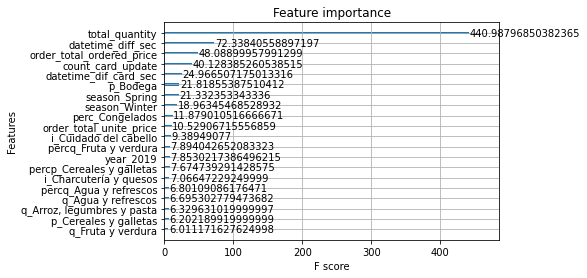

In [ ]:
from xgboost import plot_importance
plot_importance(model, max_num_features=20, importance_type='gain') # top 10 most important features
plt.show()

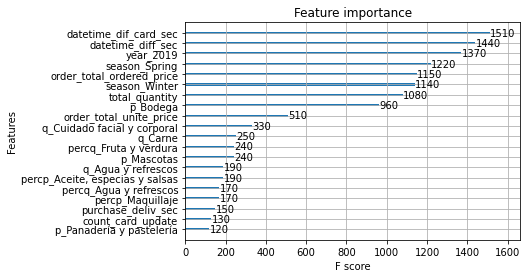

In [ ]:
from xgboost import plot_importance
plot_importance(model, max_num_features=20, importance_type='weight') # top 10 most important features
plt.show()

##2o intento

In [25]:
model = XGBClassifier(nrounds=10, eta = 0.3, gamma = 1, max_depth=60, min_child_weight=10, 
                      subsample=1, colsample_bytree=1, num_parallel_tree=10, lamda= 0, alpha=0)

4) Llamar al método fit para entrenar el modelo

In [26]:
model.fit(X_train_rand, np.array(y_train_rand))

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=1, lamda=0,
              learning_rate=0.1, max_delta_step=0, max_depth=60,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
              nrounds=10, nthread=None, num_parallel_tree=10,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

5) Llamar al método predict para generar las predicciones.

In [27]:
print('Validation data size = ' + str(X_val_rand.shape))
print('Validation target size = ' + str(y_val_rand.shape))
print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

# Combinar train y validación
X_test_rand = pd.concat((X_val_rand,X_test_rand), axis = 0)
y_test_rand = np.concatenate((y_val_rand, y_test_rand), axis = 0)

del X_val_rand, y_val_rand

print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

Validation data size = (78657, 40)
Validation target size = (78657,)
Test data size = (78657, 40)
Test target size = (78657,)
Test data size = (157314, 40)
Test target size = (157314,)


In [28]:
pred_train_p = model.predict(X_train_rand)
pred_test_p = model.predict(X_test_rand)

6) Calcular métrica usando las predicciones obtenidas en el paso anterior.

In [29]:
# Calcular métricas de evaluación
auc_train = auc(y_train_rand, pred_train_p);
auc_test = auc(y_test_rand, pred_test_p);
results = pd.DataFrame()
results = results.append(pd.DataFrame(data={'model':['XGBoost (Optimized)'],'auc_train':[auc_train],'auc_test':[auc_test]}, columns=['model',  'auc_train', 'auc_test']), ignore_index=True)

In [30]:
results

,model,auc_train,auc_test
0,XGBoost (Optimized),0.995747,0.993154


In [31]:
cm= confusion_matrix(y_test_rand, pred_test_p)
cm

array([[156290,      1],
       [    14,   1009]])

####Importancia de las variables

In [32]:
importances = list(model.feature_importances_)

In [33]:
# tuplas de importancia y variable
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(X2, importances)]
# Ordenamos las variables por importancia
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [34]:
feature_importances

[('total_quantity', 0.53496),
 ('datetime_diff_sec', 0.08775),
 ('order_total_ordered_price', 0.05834),
 ('count_card_update', 0.04868),
 ('datetime_dif_card_sec', 0.03029),
 ('p_Bodega', 0.02647),
 ('season_Spring', 0.02588),
 ('season_Winter', 0.023),
 ('perc_Congelados', 0.01441),
 ('order_total_unite_price', 0.01277),
 ('i_Cuidado del cabello', 0.01139),
 ('percq_Fruta y verdura', 0.00958),
 ('year_2019', 0.00953),
 ('percp_Cereales y galletas', 0.00931),
 ('i_Charcutería y quesos', 0.00857),
 ('percq_Agua y refrescos', 0.00825),
 ('q_Agua y refrescos', 0.00812),
 ('q_Arroz, legumbres y pasta', 0.00768),
 ('p_Cereales y galletas', 0.00752),
 ('q_Fruta y verdura', 0.00729),
 ('q_Cuidado facial y corporal', 0.00643),
 ('q_Carne', 0.00634),
 ('percp_Aceite, especias y salsas', 0.00541),
 ('p_Bebé', 0.00497),
 ('i_Huevos, leche y mantequilla', 0.00485),
 ('percq_Panadería y pastelería', 0.00478),
 ('p_Mascotas', 0.00415),
 ('p_Panadería y pastelería', 0.00348),
 ('purchase_deliv_sec', 

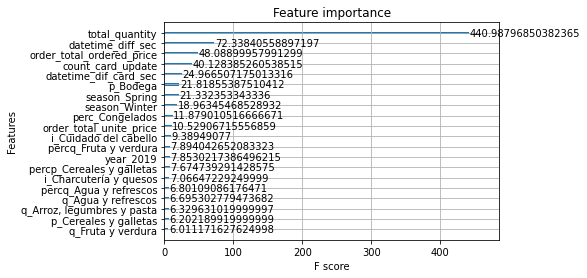

In [ ]:
from xgboost import plot_importance
plot_importance(model, max_num_features=20, importance_type='gain') # top 10 most important features
plt.show()

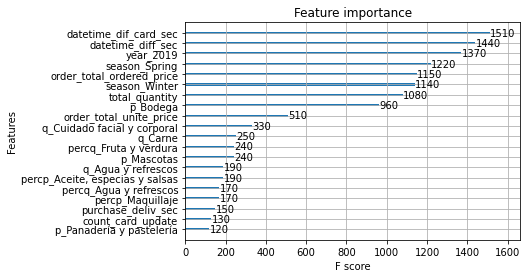

In [ ]:
from xgboost import plot_importance
plot_importance(model, max_num_features=20, importance_type='weight') # top 10 most important features
plt.show()

##3er intento

In [35]:
model = XGBClassifier(nrounds=10, eta = 0.3, gamma = 1, max_depth=60, min_child_weight=10, 
                      subsample=1, colsample_bytree=1, num_parallel_tree=10, lamda= 0, alpha=0)

4) Llamar al método fit para entrenar el modelo

In [36]:
model.fit(X_train_rand, np.array(y_train_rand))

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=1, lamda=0,
              learning_rate=0.1, max_delta_step=0, max_depth=60,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=1,
              nrounds=10, nthread=None, num_parallel_tree=10,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

5) Llamar al método predict para generar las predicciones.

In [ ]:
print('Validation data size = ' + str(X_val_rand.shape))
print('Validation target size = ' + str(y_val_rand.shape))
print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

# Combinar train y validación
X_test_rand = pd.concat((X_val_rand,X_test_rand), axis = 0)
y_test_rand = np.concatenate((y_val_rand, y_test_rand), axis = 0)

del X_val_rand, y_val_rand

print('Test data size = ' + str(X_test_rand.shape))
print('Test target size = ' + str(y_test_rand.shape))

Validation data size = (78657, 40)
Validation target size = (78657,)
Test data size = (78657, 40)
Test target size = (78657,)
Test data size = (157314, 40)
Test target size = (157314,)


In [ ]:
pred_train_p = model.predict(X_train_rand)
pred_test_p = model.predict(X_test_rand)

6) Calcular métrica usando las predicciones obtenidas en el paso anterior.

In [ ]:
# Calcular métricas de evaluación
auc_train = auc(y_train_rand, pred_train_p);
auc_test = auc(y_test_rand, pred_test_p);
results = pd.DataFrame()
results = results.append(pd.DataFrame(data={'model':['XGBoost (Optimized)'],'auc_train':[auc_train],'auc_test':[auc_test]}, columns=['model',  'auc_train', 'auc_test']), ignore_index=True)

In [ ]:
results

,model,auc_train,auc_test
0,XGBoost (Optimized),0.995747,0.993154


In [ ]:
cm= confusion_matrix(y_test_rand, pred_test_p)
cm

array([[156290,      1],
       [    14,   1009]])

####Importancia de las variables

In [ ]:
importances = list(model.feature_importances_)

In [ ]:
# tuplas de importancia y variable
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(X2, importances)]
# Ordenamos las variables por importancia
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [ ]:
feature_importances

[('total_quantity', 0.53496),
 ('datetime_diff_sec', 0.08775),
 ('order_total_ordered_price', 0.05834),
 ('count_card_update', 0.04868),
 ('datetime_dif_card_sec', 0.03029),
 ('p_Bodega', 0.02647),
 ('season_Spring', 0.02588),
 ('season_Winter', 0.023),
 ('perc_Congelados', 0.01441),
 ('order_total_unite_price', 0.01277),
 ('i_Cuidado del cabello', 0.01139),
 ('percq_Fruta y verdura', 0.00958),
 ('year_2019', 0.00953),
 ('percp_Cereales y galletas', 0.00931),
 ('i_Charcutería y quesos', 0.00857),
 ('percq_Agua y refrescos', 0.00825),
 ('q_Agua y refrescos', 0.00812),
 ('q_Arroz, legumbres y pasta', 0.00768),
 ('p_Cereales y galletas', 0.00752),
 ('q_Fruta y verdura', 0.00729),
 ('q_Cuidado facial y corporal', 0.00643),
 ('q_Carne', 0.00634),
 ('percp_Aceite, especias y salsas', 0.00541),
 ('p_Bebé', 0.00497),
 ('i_Huevos, leche y mantequilla', 0.00485),
 ('percq_Panadería y pastelería', 0.00478),
 ('p_Mascotas', 0.00415),
 ('p_Panadería y pastelería', 0.00348),
 ('purchase_deliv_sec', 

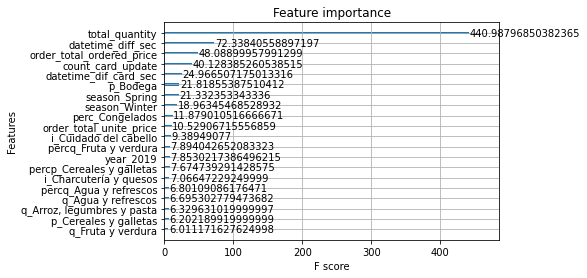

In [ ]:
from xgboost import plot_importance
plot_importance(model, max_num_features=20, importance_type='gain') # top 10 most important features
plt.show()

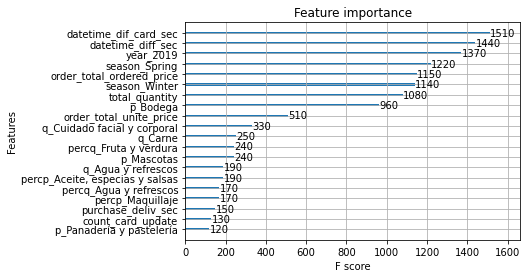

In [ ]:
from xgboost import plot_importance
plot_importance(model, max_num_features=20, importance_type='weight') # top 10 most important features
plt.show()